## Data-preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

In [2]:
path = "weather_data_updated_1.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101685 entries, 0 to 101684
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   city              101685 non-null  object 
 1   region            101685 non-null  object 
 2   lat               101685 non-null  float64
 3   lon               101685 non-null  float64
 4   date              101685 non-null  object 
 5   maxtemp_c         101685 non-null  float64
 6   mintemp_c         101685 non-null  float64
 7   avgtemp_c         101685 non-null  float64
 8   maxwind_kph       101685 non-null  float64
 9   totalprecip_mm    101685 non-null  float64
 10  avgvis_km         101685 non-null  float64
 11  avghumidity       101685 non-null  int64  
 12  uv_mean           101685 non-null  int64  
 13  sunrise           101685 non-null  object 
 14  sunset            101685 non-null  object 
 15  cloud_cover_mean  101685 non-null  int64  
dtypes: float64(8), int64

In [5]:
name_mapping = {
    'Da Nang': 'TP. Da Nang',
    'Hai Phong': 'TP. Hai Phong',
    'Ha Noi': 'TP. Ha Noi',
    'Can Tho': 'TP. Can Tho',
    'Thua Thien - Hue': 'TP. Hue'
}
df['region'] = df['region'].replace(name_mapping)

In [6]:
df['region'].unique()

array(['An Giang', 'TP. Can Tho', 'Quang Ngai', 'Ca Mau', 'Quang Ninh',
       'Soc Trang', 'Binh Thuan', 'Son La', 'Binh Phuoc', 'Tay Ninh',
       'Thai Binh', 'Binh Duong', 'Thai Nguyen', 'Binh Dinh', 'Thanh Hoa',
       'Tien Giang', 'Ben Tre', 'Tra Vinh', 'Bac Ninh', 'Tuyen Quang',
       'Vinh Long', 'Bac Lieu', 'Vinh Phuc', 'Bac Kan', 'Yen Bai',
       'Hung Yen', 'Bac Giang', 'Quang Tri', 'Quang Nam', 'Quang Binh',
       'Cao Bang', 'Phu Yen', 'Hai Duong', 'Hau Giang', 'Ha Tinh',
       'TP. Ho Chi Minh', 'Hoa Binh', 'TP. Ha Noi', 'Khanh Hoa', 'Ha Nam',
       'Kien Giang', 'Kon Tum', 'Ha Giang', 'Lai Chau', 'Gia Lai',
       'Ba Ria-Vung Tau', 'Lam Dong', 'Dong Thap', 'Lao Cai', 'Dong Nai',
       'Long An', 'Nam Dinh', 'Dien Bien', 'Nghe An', 'Dak Nong',
       'Ninh Binh', 'Ninh Thuan', 'Dak Lak', 'Phu Tho', 'TP. Da Nang',
       'Lang Son', 'TP. Hue', 'TP. Hai Phong'], dtype=object)

In [7]:
map_provinces_region = {
  'TP. Ha Noi': 'Đồng bằng sông Hồng',
  'Vinh Phuc': 'Đồng bằng sông Hồng',
  'Bac Ninh': 'Đồng bằng sông Hồng',
  'Quang Ninh': 'Đồng bằng sông Hồng',
  'Hai Duong': 'Đồng bằng sông Hồng',
  'TP. Hai Phong': 'Đồng bằng sông Hồng',
  'Hung Yen': 'Đồng bằng sông Hồng',
  'Thai Binh': 'Đồng bằng sông Hồng',
  'Ha Nam': 'Đồng bằng sông Hồng',
  'Nam Dinh': 'Đồng bằng sông Hồng',
  'Ninh Binh': 'Đồng bằng sông Hồng',
  'Ha Giang': 'Trung du và miền núi Bắc Bộ',
  'Cao Bang': 'Trung du và miền núi Bắc Bộ',
  'Bac Kan': 'Trung du và miền núi Bắc Bộ',
  'Tuyen Quang': 'Trung du và miền núi Bắc Bộ',
  'Lao Cai': 'Trung du và miền núi Bắc Bộ',
  'Yen Bai': 'Trung du và miền núi Bắc Bộ',
  'Thai Nguyen': 'Trung du và miền núi Bắc Bộ',
  'Lang Son': 'Trung du và miền núi Bắc Bộ',
  'Bac Giang': 'Trung du và miền núi Bắc Bộ',
  'Phu Tho': 'Trung du và miền núi Bắc Bộ',
  'Dien Bien': 'Trung du và miền núi Bắc Bộ',
  'Lai Chau': 'Trung du và miền núi Bắc Bộ',
  'Son La': 'Trung du và miền núi Bắc Bộ',
  'Hoa Binh': 'Trung du và miền núi Bắc Bộ',
  'Thanh Hoa': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Nghe An': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Ha Tinh': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Quang Binh': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Quang Tri': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'TP. Hue': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'TP. Da Nang': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Quang Nam': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Quang Ngai': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Binh Dinh': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Phu Yen': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Khanh Hoa': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Ninh Thuan': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Binh Thuan': 'Bắc Trung Bộ và Duyên hải miền Trung',
  'Kon Tum': 'Tây Nguyên',
  'Gia Lai': 'Tây Nguyên',
  'Dak Lak': 'Tây Nguyên',
  'Dak Nong': 'Tây Nguyên',
  'Lam Dong': 'Tây Nguyên',
  'Binh Phuoc': 'Đông Nam Bộ',
  'Tay Ninh': 'Đông Nam Bộ',
  'Binh Duong': 'Đông Nam Bộ',
  'Dong Nai': 'Đông Nam Bộ',
  'Ba Ria-Vung Tau': 'Đông Nam Bộ',
  'TP. Ho Chi Minh': 'Đông Nam Bộ',
  'Long An': 'Đồng bằng sông Cửu Long',
  'Tien Giang': 'Đồng bằng sông Cửu Long',
  'Ben Tre': 'Đồng bằng sông Cửu Long',
  'Tra Vinh': 'Đồng bằng sông Cửu Long',
  'Vinh Long': 'Đồng bằng sông Cửu Long',
  'Dong Thap': 'Đồng bằng sông Cửu Long',
  'An Giang': 'Đồng bằng sông Cửu Long',
  'Kien Giang': 'Đồng bằng sông Cửu Long',
  'TP. Can Tho': 'Đồng bằng sông Cửu Long',
  'Hau Giang': 'Đồng bằng sông Cửu Long',
  'Soc Trang': 'Đồng bằng sông Cửu Long',
  'Bac Lieu': 'Đồng bằng sông Cửu Long',
  'Ca Mau': 'Đồng bằng sông Cửu Long'
}

In [8]:
df['region_2'] = df['region'].map(map_provinces_region)

In [9]:
map_terrain = {
    'An Giang': 'đồng bằng',
    'Ba Ria-Vung Tau': 'ven biển',
    'Bac Giang': 'miền núi',
    'Bac Kan': 'miền núi',
    'Bac Lieu': 'ven biển',
    'Bac Ninh': 'đồng bằng',
    'Ben Tre': 'ven biển',
    'Binh Dinh': 'ven biển',
    'Binh Duong': 'đồng bằng',
    'Binh Phuoc': 'miền núi',
    'Binh Thuan': 'ven biển',
    'Ca Mau': 'ven biển',
    'TP. Can Tho': 'đồng bằng',
    'Cao Bang': 'miền núi',
    'TP. Da Nang': 'ven biển',
    'Dak Lak': 'miền núi',
    'Dak Nong': 'miền núi',
    'Dien Bien': 'miền núi',
    'Dong Nai': 'đồng bằng',
    'Dong Thap': 'đồng bằng',
    'Gia Lai': 'miền núi',
    'Ha Giang': 'miền núi',
    'Ha Nam': 'đồng bằng',
    'TP. Ha Noi': 'đồng bằng',
    'Ha Tinh': 'ven biển',
    'Hai Duong': 'đồng bằng',
    'TP. Hai Phong': 'ven biển',
    'Hau Giang': 'đồng bằng',
    'TP. Ho Chi Minh': 'đồng bằng',
    'Hoa Binh': 'miền núi',
    'Hung Yen': 'đồng bằng',
    'Khanh Hoa': 'ven biển',
    'Kien Giang': 'ven biển',
    'Kon Tum': 'miền núi',
    'Lai Chau': 'miền núi',
    'Lam Dong': 'miền núi',
    'Lang Son': 'miền núi',
    'Lao Cai': 'miền núi',
    'Long An': 'đồng bằng',
    'Nam Dinh': 'ven biển',
    'Nghe An': 'ven biển',
    'Ninh Binh': 'đồng bằng',
    'Ninh Thuan': 'ven biển',
    'Phu Tho': 'miền núi',
    'Phu Yen': 'ven biển',
    'Quang Binh': 'ven biển',
    'Quang Nam': 'ven biển',
    'Quang Ngai': 'ven biển',
    'Quang Ninh': 'ven biển',
    'Quang Tri': 'ven biển',
    'Soc Trang': 'ven biển',
    'Son La': 'miền núi',
    'Tay Ninh': 'đồng bằng',
    'Thai Binh': 'ven biển',
    'Thai Nguyen': 'miền núi',
    'Thanh Hoa': 'ven biển',
    'TP. Hue': 'ven biển',
    'Tien Giang': 'ven biển',
    'Tra Vinh': 'ven biển',
    'Tuyen Quang': 'miền núi',
    'Vinh Long': 'đồng bằng',
    'Vinh Phuc': 'đồng bằng',
    'Yen Bai': 'miền núi'
}

In [10]:
df['terrain'] = df['region'].map(map_terrain)

In [11]:
map_city = {
    'Long Xuyen': 'Long Xuyên',
    'Can Tho': 'Cần Thơ',
    'Quang Ngai': 'Quảng Ngãi',
    'Ca Mau': 'Cà Mau',
    'Ha Long': 'Hạ Long',
    'Soc Trang': 'Sóc Trăng',
    'Phan Thiet': 'Phan Thiết',
    'Son La': 'Sơn La',
    'Dong Xoai': 'Đồng Xoài',
    'Tay Ninh': 'Tây Ninh',
    'Thai Binh': 'Thái Bình',
    'Thu Dau Mot': 'Thủ Dầu Một',
    'Thai Nguyen': 'Thái Nguyên',
    'Quy Nhon': 'Quy Nhơn',
    'Thanh Hoa': 'Thanh Hóa',
    'My Tho': 'Mỹ Tho',
    'Ben Tre': 'Bến Tre',
    'Tra Vinh': 'Trà Vinh',
    'Bac Ninh': 'Bắc Ninh',
    'Tuyen Quang': 'Tuyên Quang',
    'Vinh Long': 'Vĩnh Long',
    'Bac Lieu': 'Bạc Liêu',
    'Vinh Yen': 'Vĩnh Yên',
    'Bac Kan': 'Bắc Kạn',
    'Yen Bai': 'Yên Bái',
    'Hung Yen': 'Hưng Yên',
    'Bac Giang': 'Bắc Giang',
    'Hoi An': 'Hội An',
    'Dong Hoi': 'Đồng Hới',
    'Cao Bang': 'Cao Bằng',
    'Tuy Hoa': 'Tuy Hòa',
    'Hai Duong': 'Hải Dương',
    'Vi Thanh': 'Vị Thanh',
    'Ha Tinh': 'Hà Tĩnh',
    'Ho Chi Minh City': 'TP. Hồ Chí Minh',
    'Hoa Binh': 'Hòa Bình',
    'Hanoi': 'Hà Nội',
    'Nha Trang': 'Nha Trang',
    'Phu Ly': 'Phủ Lý',
    'Rach Gia': 'Rạch Giá',
    'Kon Tum': 'Kon Tum',
    'Ha Giang': 'Hà Giang',
    'Lai Chau': 'Lai Châu',
    'Pleiku': 'Pleiku',
    'Vung Tau': 'Vũng Tàu',
    'Da Lat': 'Đà Lạt',
    'Cao Lanh': 'Cao Lãnh',
    'Lao Cai': 'Lào Cai',
    'Bien Hoa': 'Biên Hòa',
    'Tan An': 'Tân An',
    'Nam Dinh': 'Nam Định',
    'Dien Bien Phu': 'Điện Biên Phủ',
    'Vinh': 'Vinh',
    'Gia Nghia': 'Gia Nghĩa',
    'Ninh Binh': 'Ninh Bình',
    'Phan Rang- Thap Cham': 'Phan Rang - Tháp Chàm',
    'Buon Ma Thuot': 'Buôn Ma Thuột',
    'Viet Tri': 'Việt Trì',
    'Da Nang': 'Đà Nẵng',
    'Lang Son': 'Lạng Sơn',
    'Hue': 'Huế',
    'Hai Phong': 'Hải Phòng',
}


In [12]:
df['city'] = df['city'].map(map_city)

In [13]:
map_province = {
    'An Giang': 'An Giang',
    'TP. Can Tho': 'TP. Cần Thơ',
    'Quang Ngai': 'Quảng Ngãi',
    'Ca Mau': 'Cà Mau',
    'Quang Ninh': 'Quảng Ninh',
    'Soc Trang': 'Sóc Trăng',
    'Binh Thuan': 'Bình Thuận',
    'Son La': 'Sơn La',
    'Binh Phuoc': 'Bình Phước',
    'Tay Ninh': 'Tây Ninh',
    'Thai Binh': 'Thái Bình',
    'Binh Duong': 'Bình Dương',
    'Thai Nguyen': 'Thái Nguyên',
    'Binh Dinh': 'Bình Định',
    'Thanh Hoa': 'Thanh Hóa',
    'Tien Giang': 'Tiền Giang',
    'Ben Tre': 'Bến Tre',
    'Tra Vinh': 'Trà Vinh',
    'Bac Ninh': 'Bắc Ninh',
    'Tuyen Quang': 'Tuyên Quang',
    'Vinh Long': 'Vĩnh Long',
    'Bac Lieu': 'Bạc Liêu',
    'Vinh Phuc': 'Vĩnh Phúc',
    'Bac Kan': 'Bắc Kạn',
    'Yen Bai': 'Yên Bái',
    'Hung Yen': 'Hưng Yên',
    'Bac Giang': 'Bắc Giang',
    'Quang Tri': 'Quảng Trị',
    'Quang Nam': 'Quảng Nam',
    'Quang Binh': 'Quảng Bình',
    'Cao Bang': 'Cao Bằng',
    'Phu Yen': 'Phú Yên',
    'Hai Duong': 'Hải Dương',
    'Hau Giang': 'Hậu Giang',
    'Ha Tinh': 'Hà Tĩnh',
    'TP. Ho Chi Minh': 'TP. Hồ Chí Minh',
    'Hoa Binh': 'Hòa Bình',
    'TP. Ha Noi': 'TP. Hà Nội',
    'Khanh Hoa': 'Khánh Hòa',
    'Ha Nam': 'Hà Nam',
    'Kien Giang': 'Kiên Giang',
    'Kon Tum': 'Kon Tum',
    'Ha Giang': 'Hà Giang',
    'Lai Chau': 'Lai Châu',
    'Gia Lai': 'Gia Lai',
    'Ba Ria-Vung Tau': 'Bà Rịa - Vũng Tàu',
    'Lam Dong': 'Lâm Đồng',
    'Dong Thap': 'Đồng Tháp',
    'Lao Cai': 'Lào Cai',
    'Dong Nai': 'Đồng Nai',
    'Long An': 'Long An',
    'Nam Dinh': 'Nam Định',
    'Dien Bien': 'Điện Biên',
    'Nghe An': 'Nghệ An',
    'Dak Nong': 'Đắk Nông',
    'Ninh Binh': 'Ninh Bình',
    'Ninh Thuan': 'Ninh Thuận',
    'Dak Lak': 'Đắk Lắk',
    'Phu Tho': 'Phú Thọ',
    'TP. Da Nang': 'TP. Đà Nẵng',
    'Lang Son': 'Lạng Sơn',
    'TP. Hue': 'TP. Huế',
    'TP. Hai Phong': 'TP. Hải Phòng',
}


In [14]:
df['region'] = df['region'].map(map_province)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101685 entries, 0 to 101684
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   city              101685 non-null  object 
 1   region            101685 non-null  object 
 2   lat               101685 non-null  float64
 3   lon               101685 non-null  float64
 4   date              101685 non-null  object 
 5   maxtemp_c         101685 non-null  float64
 6   mintemp_c         101685 non-null  float64
 7   avgtemp_c         101685 non-null  float64
 8   maxwind_kph       101685 non-null  float64
 9   totalprecip_mm    101685 non-null  float64
 10  avgvis_km         101685 non-null  float64
 11  avghumidity       101685 non-null  int64  
 12  uv_mean           101685 non-null  int64  
 13  sunrise           101685 non-null  object 
 14  sunset            101685 non-null  object 
 15  cloud_cover_mean  101685 non-null  int64  
 16  region_2          10

In [16]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['sunrise_dt'] = pd.to_datetime(df['sunrise'], format='%I:%M %p')
df['sunset_dt'] = pd.to_datetime(df['sunset'], format='%I:%M %p')

In [17]:
df_v2 = df[['city', 'region', 'region_2', 'terrain', 'lat', 'lon', 'date', 'year', 'month', 'quarter', 'maxtemp_c', 'mintemp_c', 'avgtemp_c', 'maxwind_kph', 'totalprecip_mm', 'avgvis_km', 'avghumidity', 'uv_mean', 'sunrise_dt', 'sunset_dt', 'cloud_cover_mean']].copy()

In [18]:
df_v2.columns = ['name', 'province', 'region', 'terrain', 'lat', 'lon', 'date', 'year', 'month', 'quarter', 'maxtemp_c', 'mintemp_c', 'avgtemp_c', 'maxwind_kph', 'totalprecip_mm', 'avgvis_km', 'avghumidity', 'uv_mean', 'sunrise', 'sunset', 'cloud_cover_mean']

In [19]:
df_ranking = df_v2[['name', 'province', 'region', 'terrain', 'lat', 'lon', 'date', 'year', 'month', 'quarter']].copy()

## Nhiệt độ, lượng mưa thay đổi như thế nào theo từng tháng tại một địa điểm cụ thể?

In [20]:
name_data = df_v2[df_v2['province'] == 'TP. Hà Nội']
name_data = name_data.sort_values(by='date', ascending=True).copy()
mounth_data = name_data.groupby('month').agg(
  max_temp = ('maxtemp_c', 'max'),
  min_temp = ('mintemp_c', 'min'),
  avg_temp = ('avgtemp_c', 'mean'),

  max_totalprecip_mm = ('totalprecip_mm', 'max'),
  min_totalprecip_mm = ('totalprecip_mm', 'min'),
  avg_totalprecip_mm = ('totalprecip_mm', 'mean'),  
).reset_index()

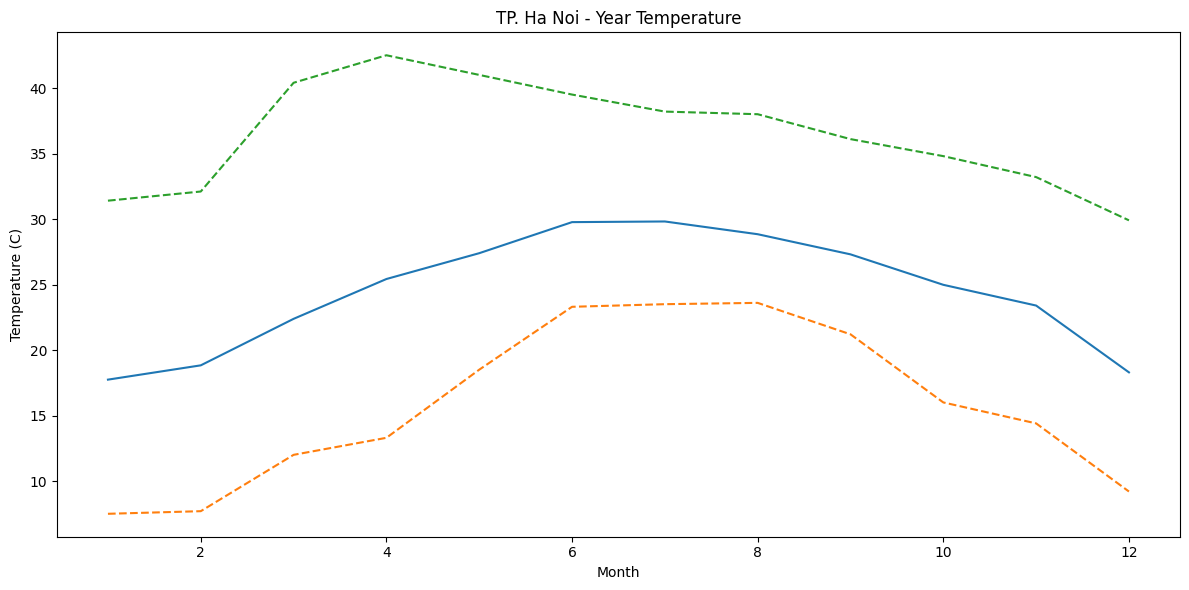

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_temp'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_temp'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_temp'], linestyle='--')
plt.title('TP. Ha Noi - Year Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

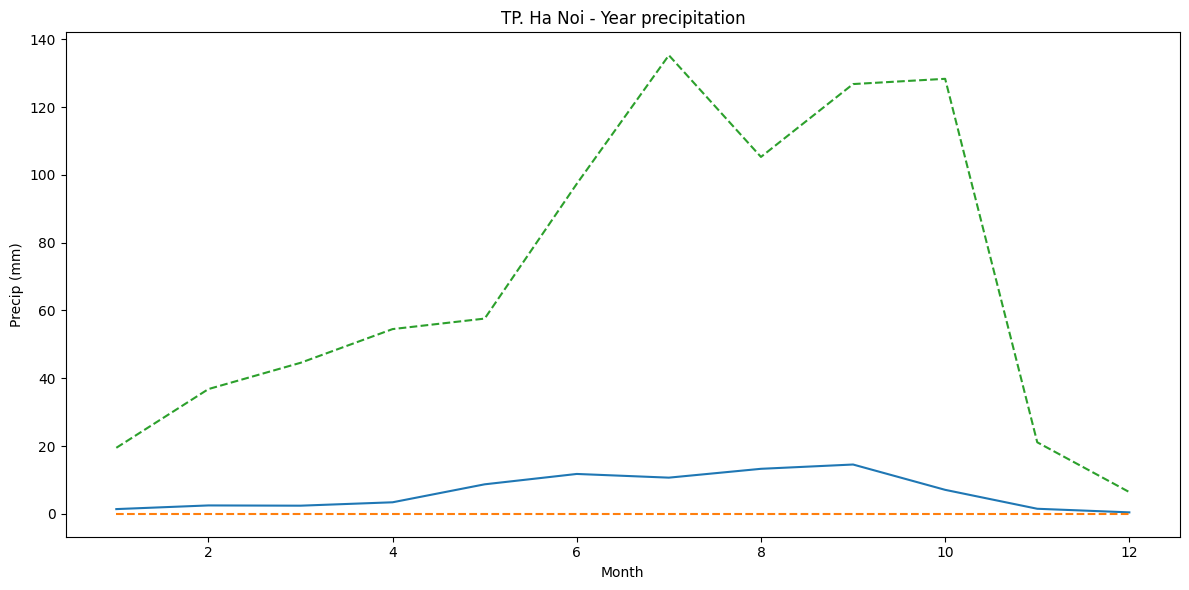

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_totalprecip_mm'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_totalprecip_mm'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_totalprecip_mm'], linestyle='--')
plt.title('TP. Ha Noi - Year precipitation')
plt.xlabel('Month')
plt.ylabel('Precip (mm)')
plt.tight_layout()
plt.show()

In [23]:
name_data = df_v2[df_v2['province'] == 'TP. Đà Nẵng']
name_data = name_data.sort_values(by='date', ascending=True).copy()
mounth_data = name_data.groupby('month').agg(
  max_temp = ('maxtemp_c', 'max'),
  min_temp = ('mintemp_c', 'min'),
  avg_temp = ('avgtemp_c', 'mean'),

  max_totalprecip_mm = ('totalprecip_mm', 'max'),
  min_totalprecip_mm = ('totalprecip_mm', 'min'),
  avg_totalprecip_mm = ('totalprecip_mm', 'mean'),  
).reset_index()

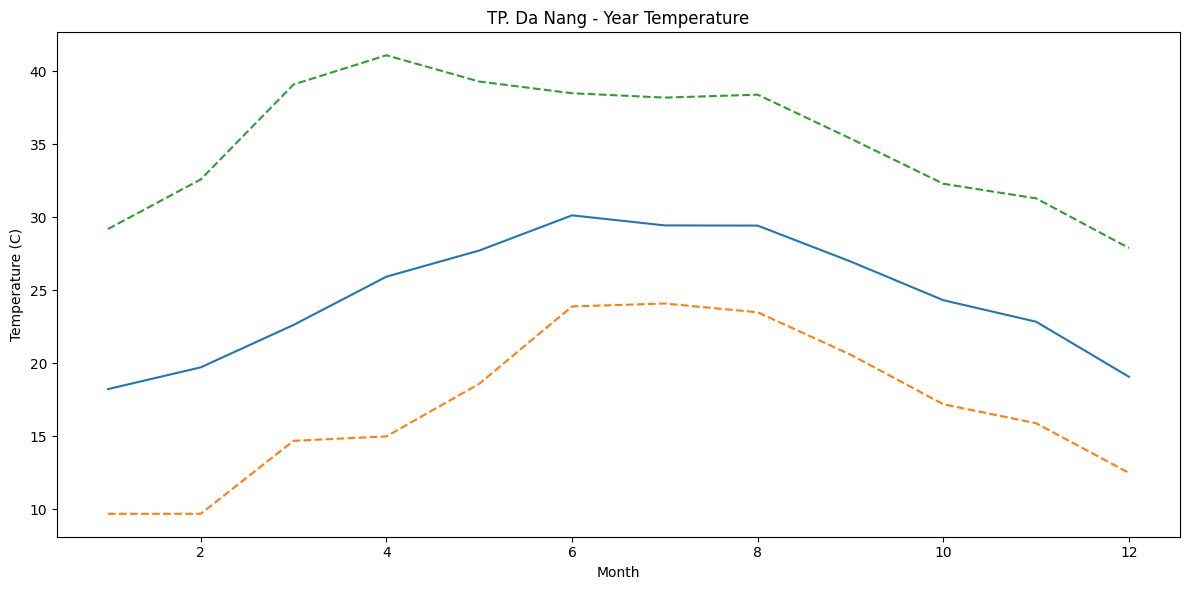

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_temp'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_temp'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_temp'], linestyle='--')
plt.title('TP. Da Nang - Year Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

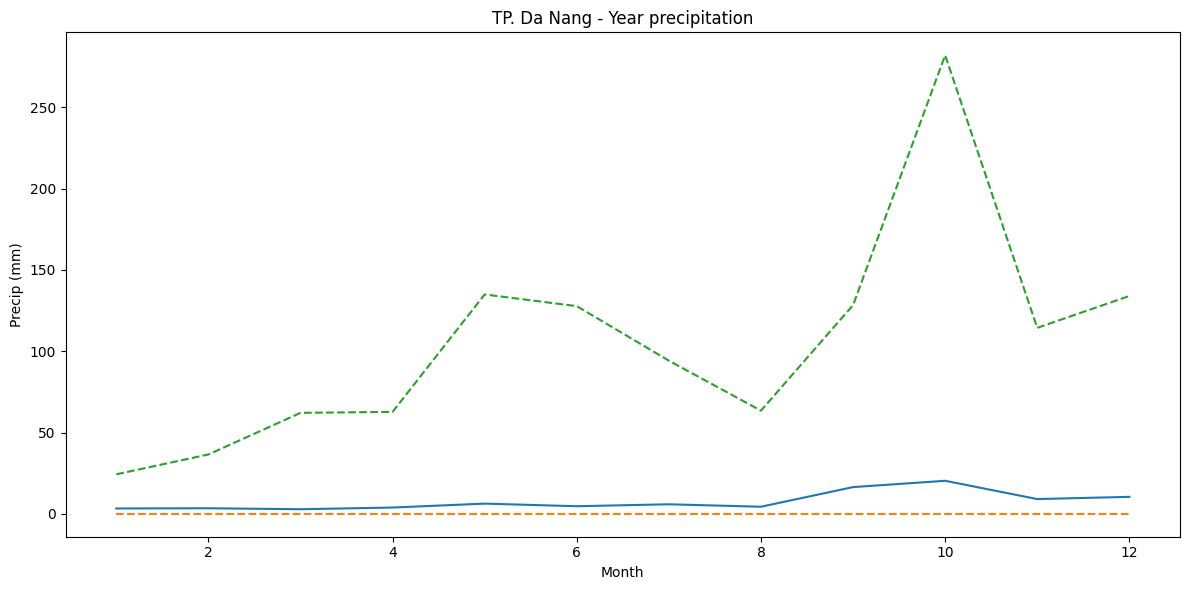

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_totalprecip_mm'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_totalprecip_mm'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_totalprecip_mm'], linestyle='--')
plt.title('TP. Da Nang - Year precipitation')
plt.xlabel('Month')
plt.ylabel('Precip (mm)')
plt.tight_layout()
plt.show()

In [26]:
name_data = df_v2[df_v2['province'] == 'TP. Hồ Chí Minh']
name_data = name_data.sort_values(by='date', ascending=True).copy()
mounth_data = name_data.groupby('month').agg(
  max_temp = ('maxtemp_c', 'max'),
  min_temp = ('mintemp_c', 'min'),
  avg_temp = ('avgtemp_c', 'mean'),

  max_totalprecip_mm = ('totalprecip_mm', 'max'),
  min_totalprecip_mm = ('totalprecip_mm', 'min'),
  avg_totalprecip_mm = ('totalprecip_mm', 'mean'),  
).reset_index()

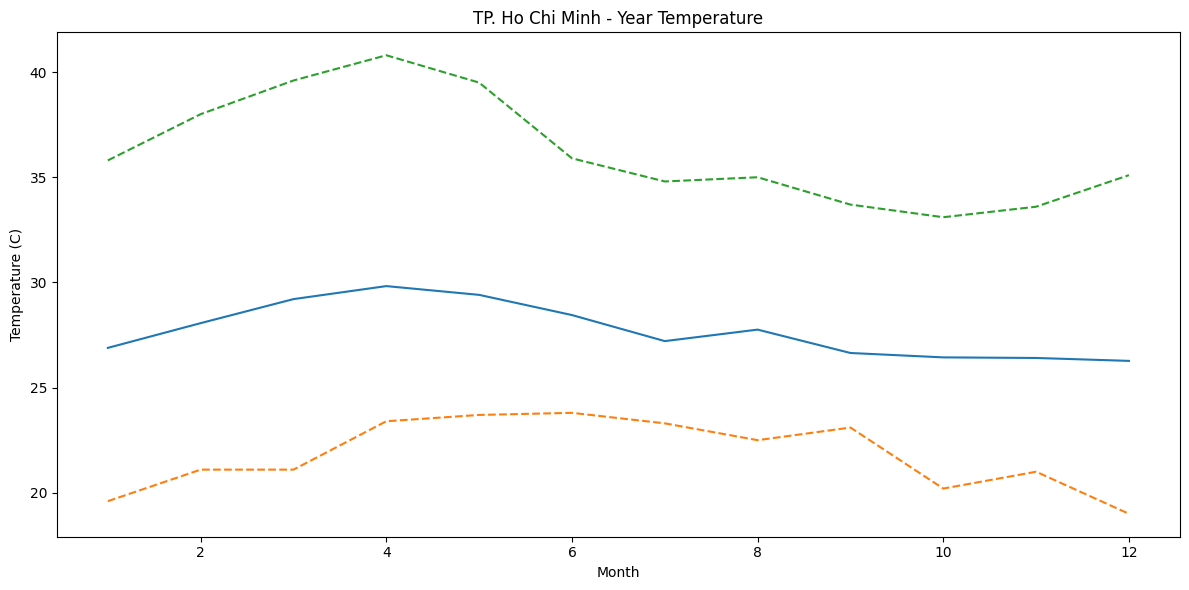

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_temp'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_temp'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_temp'], linestyle='--')
plt.title('TP. Ho Chi Minh - Year Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

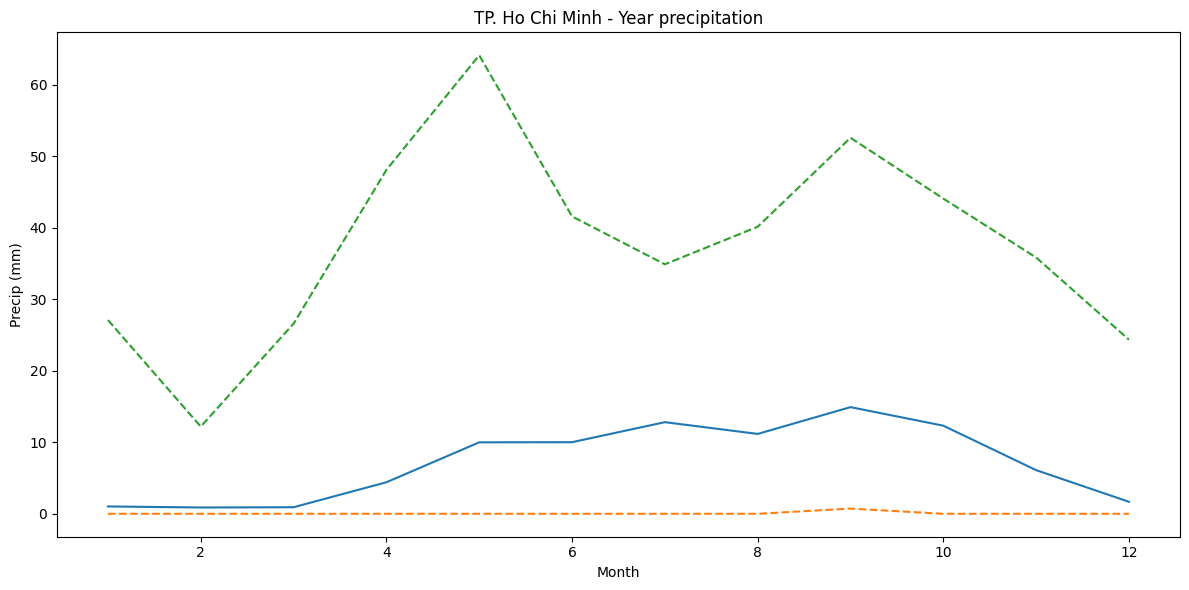

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_totalprecip_mm'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_totalprecip_mm'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_totalprecip_mm'], linestyle='--')
plt.title('TP. Ho Chi Minh - Year precipitation')
plt.xlabel('Month')
plt.ylabel('Precip (mm)')
plt.tight_layout()
plt.show()

## Phân bố nhiệt độ trung bình như thế nào theo từng khu vực và theo mùa (xuân, hạ, thu, đông)?

In [29]:
temp_data = df_v2[['region', 'month', 'quarter', 'date', 'avgtemp_c']].copy()
temp_mean = temp_data.groupby(['region', 'quarter']).agg(
  mean_temp=('avgtemp_c', 'mean'),
).reset_index()

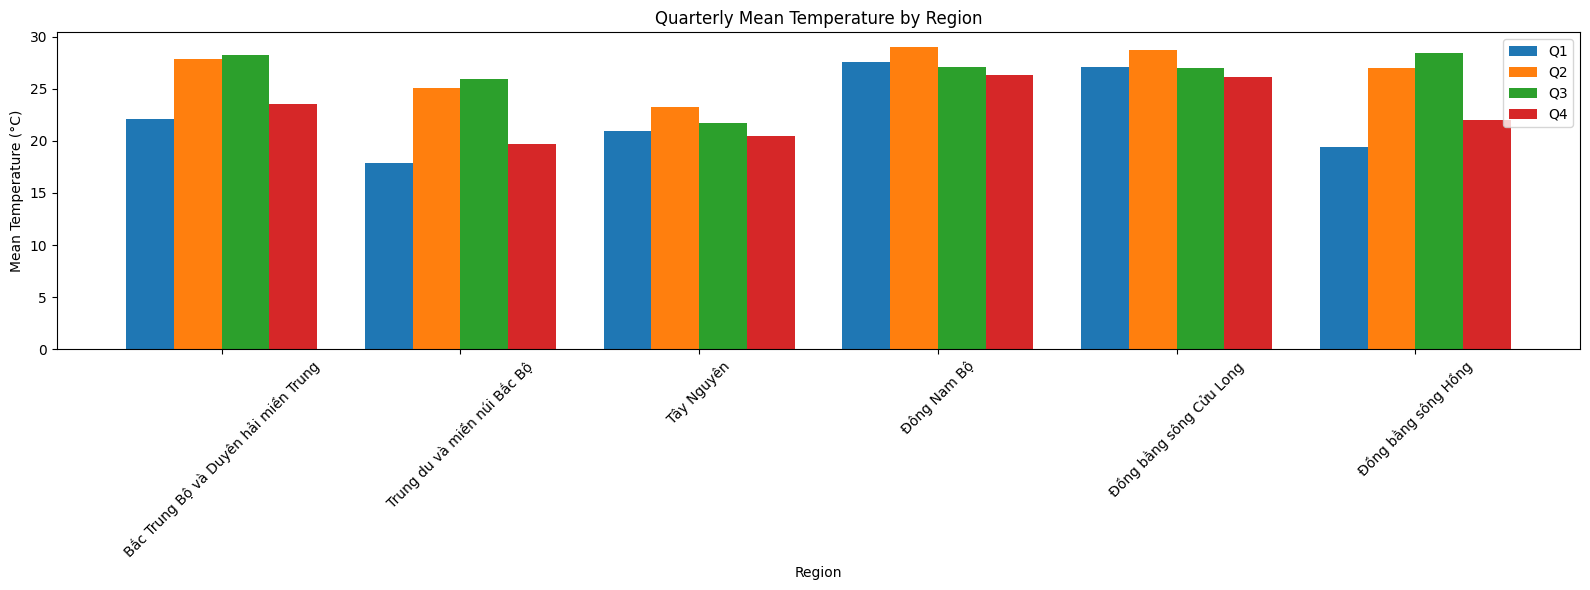

In [30]:
plt.figure(figsize=(16, 6))
temp_mean_agg = temp_mean.groupby(['region', 'quarter'], as_index=False).mean()

pivot_temp_mean = temp_mean_agg.pivot(index='region', columns='quarter', values='mean_temp').fillna(0)

x = range(len(pivot_temp_mean))

bar_width = 0.2
x = np.arange(len(pivot_temp_mean))

plt.bar(x - 1.5 * bar_width, pivot_temp_mean[1], width=bar_width, label='Q1')
plt.bar(x - 0.5 * bar_width, pivot_temp_mean[2], width=bar_width, label='Q2')
plt.bar(x + 0.5 * bar_width, pivot_temp_mean[3], width=bar_width, label='Q3')
plt.bar(x + 1.5 * bar_width, pivot_temp_mean[4], width=bar_width, label='Q4')

plt.xticks(x, pivot_temp_mean.index, rotation=45)
plt.title('Quarterly Mean Temperature by Region')
plt.xlabel('Region')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
temp_quarter_ranking = temp_mean_agg.groupby('quarter').agg(
  mean_temp=('mean_temp', 'mean'),
).reset_index().sort_values(by='quarter', ascending=True)

In [32]:
temp_quarter_ranking

,quarter,mean_temp
0,1,22.497538
1,2,26.819045
2,3,26.422702
3,4,23.021595


highest_1st_temp_quarter là xếp hạng nhiệt độ trung bình theo từng quý trên toàn quốc. Cao nhất hạng 1.

In [33]:
df_ranking = df_ranking.merge(
    temp_quarter_ranking[['quarter', 'mean_temp']].rename(columns={'mean_temp': 'temp_quarter'}),
    on='quarter',
    how='left'
)


In [34]:
temp_region_ranking = temp_mean_agg.groupby('region').agg(
  mean_temp=('mean_temp', 'mean'),
).reset_index()

In [35]:
temp_region_ranking

,region,mean_temp
0,Bắc Trung Bộ và Duyên hải miền Trung,25.440844
1,Trung du và miền núi Bắc Bộ,22.149042
2,Tây Nguyên,21.582828
3,Đông Nam Bộ,27.495258
4,Đồng bằng sông Cửu Long,27.220692
5,Đồng bằng sông Hồng,24.252656


highest_1st_temp_region là xếp hạng nhiệt độ trung bình theo từng khu vực trên toàn quốc. Cao nhất hạng 1.

In [36]:
df_ranking = df_ranking.merge(
    temp_region_ranking[['region', 'mean_temp']].rename(columns={'mean_temp': 'temp_region'}),
    on='region',
    how='left'
)


## Độ ẩm biến động ra sao giữa các địa hình?

In [37]:
ven_bien_df = df_v2[df_v2['terrain'] == 'ven biển']
dong_bang_df = df_v2[df_v2['terrain'] == 'đồng bằng']
mien_nui_df = df_v2[df_v2['terrain'] == 'miền núi']

ven_bien_by = ven_bien_df.groupby('date')['avghumidity'].mean().reset_index(name='mean_humidity')
dong_bang_by = dong_bang_df.groupby('date')['avghumidity'].mean().reset_index(name='mean_humidity')
mien_nui_by = mien_nui_df.groupby('date')['avghumidity'].mean().reset_index(name='mean_humidity')

ven_bien_by['month'] = ven_bien_by['date'].dt.month
dong_bang_by['month'] = dong_bang_by['date'].dt.month
mien_nui_by['month'] = mien_nui_by['date'].dt.month

In [38]:
month_ven_bien_by = ven_bien_by.groupby('month').agg(
  max_avghumidity = ('mean_humidity', 'max'),
  min_avghumidity = ('mean_humidity', 'min'),
  avg_avghumidity = ('mean_humidity', 'mean'),  
).reset_index()

In [39]:
month_dong_bang_by = dong_bang_by.groupby('month').agg(
  max_avghumidity = ('mean_humidity', 'max'),
  min_avghumidity = ('mean_humidity', 'min'),
  avg_avghumidity = ('mean_humidity', 'mean'),  
).reset_index()

In [40]:
month_mien_nui_by = mien_nui_by.groupby('month').agg(
  max_avghumidity = ('mean_humidity', 'max'),
  min_avghumidity = ('mean_humidity', 'min'),
  avg_avghumidity = ('mean_humidity', 'mean'),  
).reset_index()

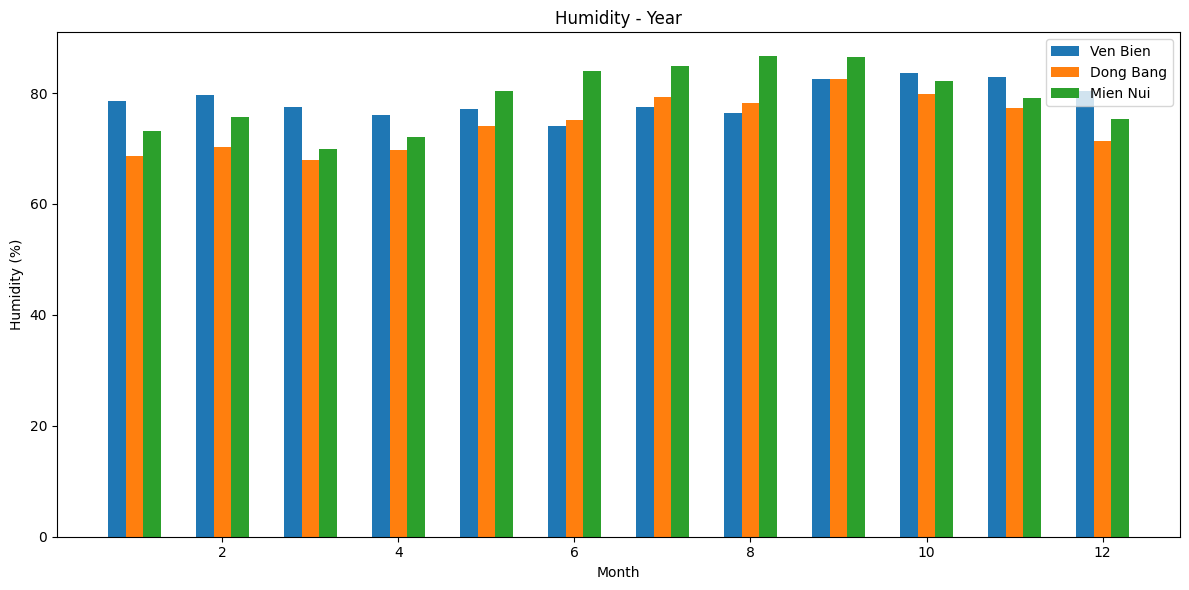

In [41]:
plt.figure(figsize=(12, 6))
width = 0.2
plt.bar(month_ven_bien_by['month'] - width, month_ven_bien_by['avg_avghumidity'], width=width, label='Ven Bien')
plt.bar(month_dong_bang_by['month'], month_dong_bang_by['avg_avghumidity'], width=width, label='Dong Bang')
plt.bar(month_mien_nui_by['month'] + width, month_mien_nui_by['avg_avghumidity'], width=width, label='Mien Nui')
plt.title('Humidity - Year')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
month_by = month_ven_bien_by.merge(
	month_mien_nui_by, on='month', suffixes=('_ven_bien', '_mien_nui')
).merge(
	month_dong_bang_by, on='month'
)

In [43]:
month_by['diff_mien_nui_dong_bang'] = month_by['avg_avghumidity_mien_nui'] - month_by['avg_avghumidity']
month_by['diff_ven_bien_dong_bang'] = month_by['avg_avghumidity_ven_bien'] - month_by['avg_avghumidity']

In [44]:
diff_mien_nui_dong_bang_mean = month_by['diff_mien_nui_dong_bang'].mean()
diff_ven_bien_dong_bang_mean = month_by['diff_ven_bien_dong_bang'].mean()

In [45]:
print(f"Mean difference between Mien Nui and Dong Bang: {diff_mien_nui_dong_bang_mean:.2f}")
print(f"Mean difference between Ven Bien and Dong Bang: {diff_ven_bien_dong_bang_mean:.2f}")

Mean difference between Mien Nui and Dong Bang: 4.62
Mean difference between Ven Bien and Dong Bang: 4.32


## Tần suất xảy ra mưa theo tháng ở các khu vực là bao nhiêu?

In [46]:
rain_df = df_v2[['name', 'date', 'totalprecip_mm']]
rain_df['rain'] = rain_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)
rain_df = rain_df.groupby(['name']).agg(
  rain = ('rain', 'mean'),
).reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17372\1130328206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df['rain'] = rain_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)


In [47]:
rain_df['rain'] = rain_df['rain'] * 100

In [48]:
rain_df[['name','rain']].sort_values(by='rain',ascending=False).head(10)

,name,rain
21,Hội An,85.006196
9,Cà Mau,84.944238
46,Tuy Hòa,82.775713
35,Quy Nhơn,82.775713
37,Rạch Giá,82.713755
23,Lai Châu,82.280050
12,Huế,82.229102
36,Quảng Ngãi,81.944875
8,Cao Lãnh,81.040892
38,Sóc Trăng,80.607187


In [49]:
rain_df[['name','rain']].sort_values(by='rain',ascending=True).head(10)

,name,rain
32,Phan Thiết,62.577447
22,Kon Tum,64.931846
34,Pleiku,64.931846
47,Tuyên Quang,65.613383
51,Việt Trì,65.613383
53,Vĩnh Yên,65.613383
56,Yên Bái,65.613383
16,Hòa Bình,66.047088
14,Hà Nội,67.224287
57,Điện Biên Phủ,67.534077


In [50]:
rain_name_df = df_v2[['name', 'date', 'month', 'totalprecip_mm']]
rain_name_df['rain'] = rain_name_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)
rain_name_df = rain_name_df.groupby(['name', 'month']).agg(
  rain = ('rain', 'mean'),
).reset_index()

rain_name_df_max = rain_name_df.groupby(['month']).agg(
  max_rain = ('rain', 'max'),
).reset_index()
rain_name_df_max = rain_name_df_max.merge(
    rain_name_df,
    how='left',
    left_on=['month', 'max_rain'],
    right_on=['month', 'rain']
)[['name', 'month', 'max_rain']]

rain_name_df_min = rain_name_df.groupby(['month']).agg(
  min_rain = ('rain', 'min'),
).reset_index()
rain_name_df_min = rain_name_df_min.merge(
    rain_name_df,
    how='left',
    left_on=['month', 'min_rain'],
    right_on=['month', 'rain']
)[['name', 'month', 'min_rain']]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17372\2765096863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_name_df['rain'] = rain_name_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)


In [51]:
rain_name_df_max['max_rain'] = rain_name_df_max['max_rain'] * 100
rain_name_df_min['min_rain'] = rain_name_df_min['min_rain'] * 100

In [52]:
rain_name_df_max.sort_values(by='month', ascending=True)

,name,month,max_rain
0,Hội An,1,86.451613
1,Đồng Hới,2,86.524823
2,Lai Châu,3,76.774194
3,Cà Mau,4,86.000000
4,Bạc Liêu,5,98.709677
5,Sóc Trăng,5,98.709677
6,Tây Ninh,5,98.709677
7,Bến Tre,6,100.000000
8,Cao Lãnh,6,100.000000
9,Cần Thơ,6,100.000000


In [53]:
rain_name_df_min.sort_values(by='month', ascending=True)

,name,month,min_rain
0,Kon Tum,1,13.548387
1,Pleiku,1,13.548387
2,Phan Thiết,2,12.056738
3,Phan Thiết,3,18.064516
4,Hà Tĩnh,4,48.000000
5,Đà Nẵng,4,48.000000
6,Vinh,5,62.580645
7,Vinh,6,50.819672
8,Hà Tĩnh,7,72.580645
9,Đà Nẵng,7,72.580645


In [54]:
rain_name_df = df_v2[['name', 'date', 'month', 'totalprecip_mm']]
rain_name_df['rain'] = rain_name_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)
rain_name_df = rain_name_df.groupby(['name', 'month']).agg(
  rain = ('rain', 'mean'),
).reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17372\3383904259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_name_df['rain'] = rain_name_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)


lowest_1st_rain_frequency_month_name là xếp hạng tần suất có mưa theo tháng trên mỗi nơi. Thấp nhất hạng 1.

In [55]:
df_ranking = df_ranking.merge(
    rain_name_df[['name', 'month', 'rain']].rename(columns={'rain': 'rain_frequency_month_name'}),
    on=['name', 'month'],
    how='left'
)

## Có mối quan hệ nào giữa các yếu tố không?

In [56]:
df_v3 = df_v2.copy()

In [57]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in ['name', 'province', 'region', 'terrain']:
    df_v3[col] = label_enc.fit_transform(df_v3[col].astype(str))


In [58]:
corr_matrix = df_v3.corr(numeric_only=True)

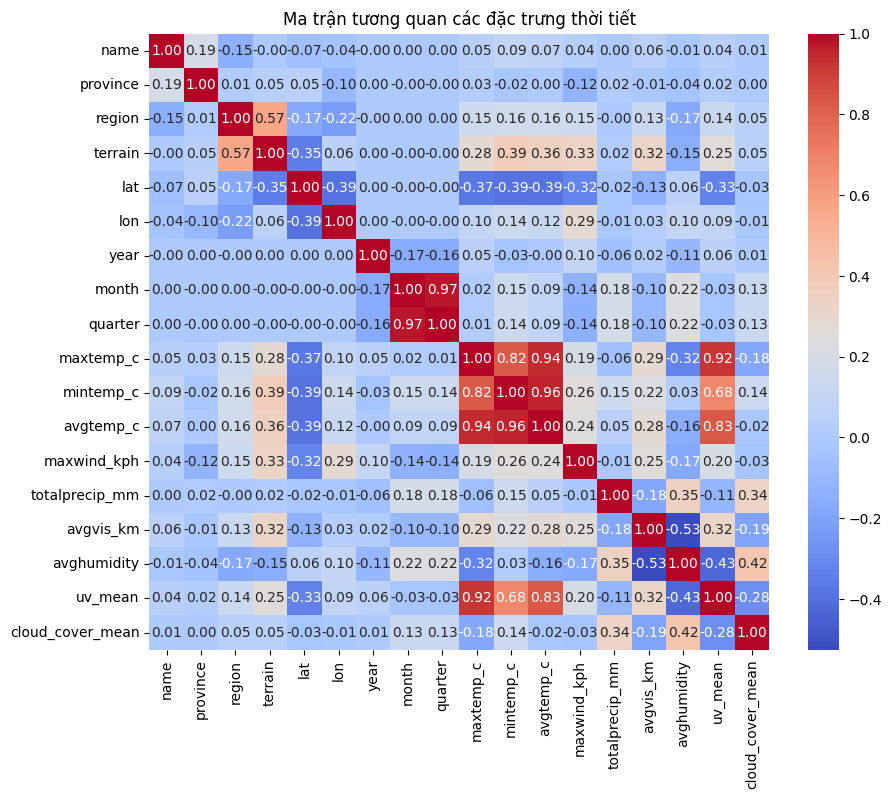

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan các đặc trưng thời tiết")
plt.show()


<Figure size 1200x600 with 0 Axes>

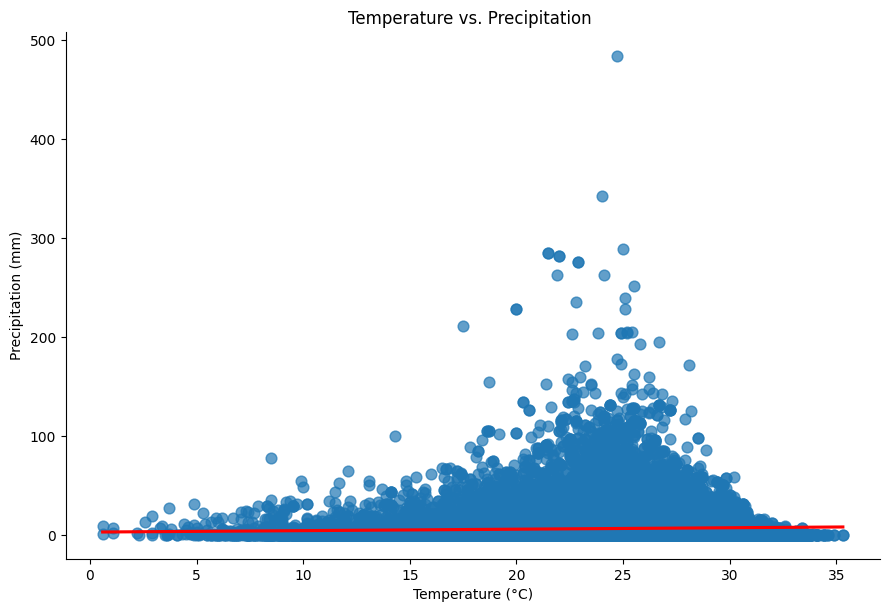

In [60]:
plt.figure(figsize=(12, 6))
sns.lmplot(
    data=df_v2,
    x='avgtemp_c',
    y='totalprecip_mm',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title('Temperature vs. Precipitation ')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()

<Figure size 1200x600 with 0 Axes>

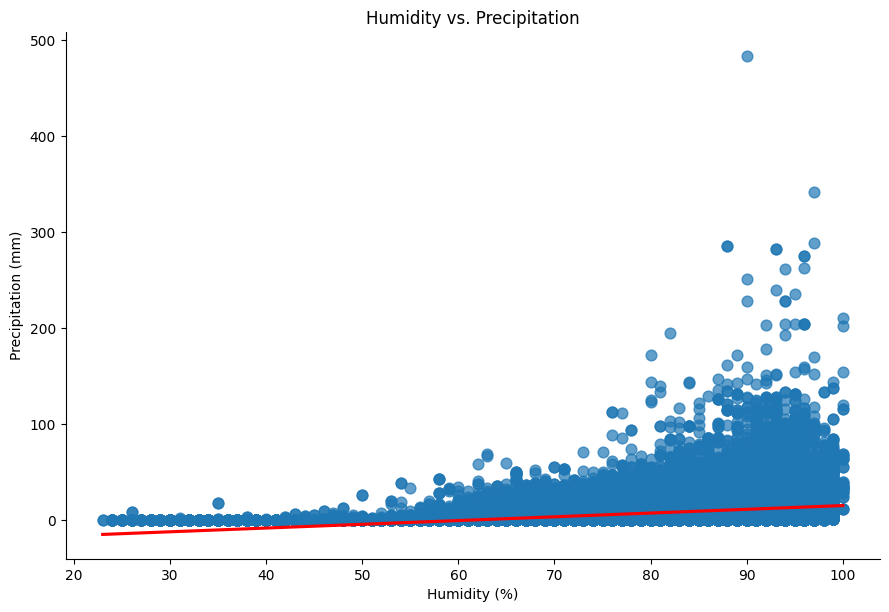

In [61]:
plt.figure(figsize=(12, 6))
sns.lmplot(
    data=df_v2,
    x='avghumidity',
    y='totalprecip_mm',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title('Humidity vs. Precipitation')
plt.xlabel('Humidity (%)')
plt.ylabel('Precipitation (mm)')
plt.show()

Humidity vs. Precipitation tỉ lệ thuận

<Figure size 1200x600 with 0 Axes>

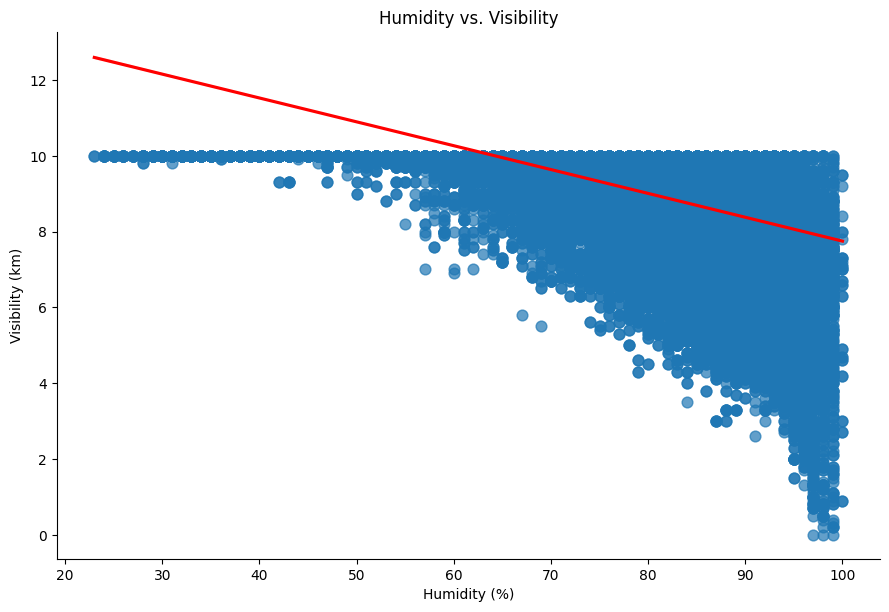

In [62]:
plt.figure(figsize=(12, 6))
sns.lmplot(
    data=df_v2,
    x='avghumidity',
    y='avgvis_km',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title('Humidity vs. Visibility')
plt.xlabel('Humidity (%)')
plt.ylabel('Visibility (km)')
plt.show()

Humidity vs. Visibility tỉ lệ nghịch

<Figure size 1200x600 with 0 Axes>

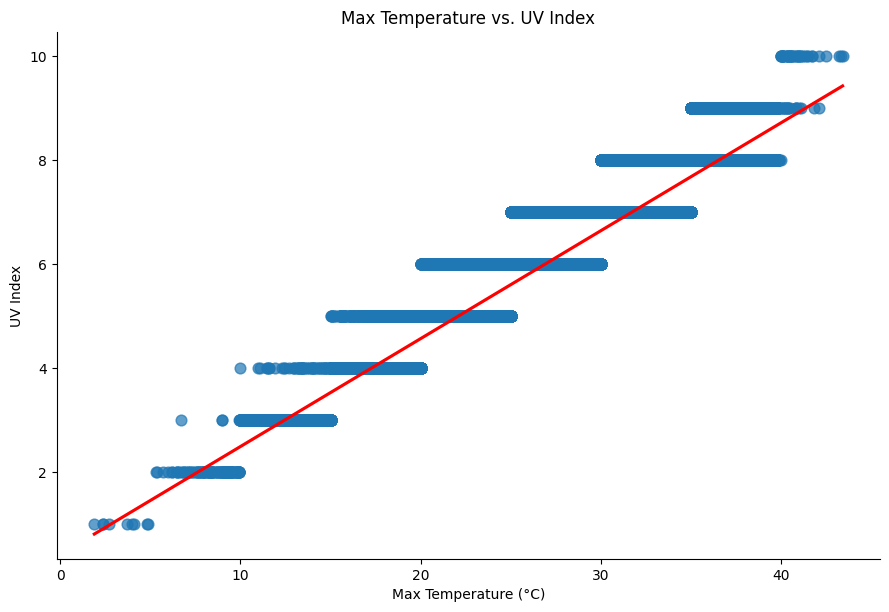

In [63]:
plt.figure(figsize=(12, 6))
sns.lmplot(
    data=df_v2,
    x='maxtemp_c',
    y='uv_mean',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title('Max Temperature vs. UV Index')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('UV Index')
plt.show()

Max Temperature vs. UV Index tỉ lệ thuận

## Có bất kỳ giá trị ngoại lai nào trong dữ liệu lượng mưa, nhiệt độ, độ ẩm không?

In [64]:
def detect_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return outliers

precip_outliers = detect_outliers_iqr(df_v2, 'totalprecip_mm')

temp_outliers = detect_outliers_iqr(df_v2, 'avgtemp_c')

humidity_outliers = detect_outliers_iqr(df_v2, 'avghumidity')

print(f"Number of precipitation outliers: {len(precip_outliers)}")
print(f"Number of temperature outliers: {len(temp_outliers)}")
print(f"Number of humidity outliers: {len(humidity_outliers)}")

Number of precipitation outliers: 8813
Number of temperature outliers: 2000
Number of humidity outliers: 1564


## Những địa phương nào có thời tiết ổn định nhất (nhiệt độ, mưa, gió ít biến động)?

In [65]:
temp_diff_by_day = df_v2[['name','date','avgtemp_c']].sort_values(by=['name', 'date'])
temp_diff_by_day['temp_diff'] = df_v2.groupby('name')['avgtemp_c'].diff()
temp_diff_by_day['temp_diff'] = abs(temp_diff_by_day['temp_diff'])
temp_diff_by_day = temp_diff_by_day.groupby('name').agg(
  max_temp_diff = ('temp_diff', 'max'),
  avg_temp_diff = ('temp_diff', 'mean'),
).reset_index()

In [66]:
temp_diff_by_day.sort_values(by='max_temp_diff', ascending=True)[['name','max_temp_diff']].head(5)

,name,max_temp_diff
54,Vũng Tàu,2.2
32,Phan Thiết,2.4
31,Phan Rang - Tháp Chàm,2.5
29,Nha Trang,2.9
35,Quy Nhơn,3.0


lowest_1st_maxdiff_temp_name là xếp hạng sự chênh lệch nhiệt độ lớn nhất giữa các ngày trên mỗi nơi. Thấp nhất hạng 1.

In [67]:
df_ranking = df_ranking.merge(
    temp_diff_by_day[['name', 'max_temp_diff']].rename(columns={'max_temp_diff': 'maxdiff_temp_name'}),
    on='name',
    how='left'
)

In [68]:
temp_diff_by_day.sort_values(by='avg_temp_diff')[['name','avg_temp_diff']].head(5)

,name,avg_temp_diff
54,Vũng Tàu,0.374644
31,Phan Rang - Tháp Chàm,0.385307
32,Phan Thiết,0.415375
29,Nha Trang,0.436330
37,Rạch Giá,0.450775


lowest_1st_avgdiff_temp_name là xếp hạng sự chênh lệch nhiệt độ trung bình giữa các ngày trên mỗi nơi. Thấp nhất hạng 1.

In [69]:
df_ranking = df_ranking.merge(
    temp_diff_by_day[['name', 'avg_temp_diff']].rename(columns={'avg_temp_diff': 'avgdiff_temp_name'}),
    on='name',
    how='left'
)

In [70]:
wind_diff_by_day = df_v2[['name','date','maxwind_kph']].sort_values(by=['name', 'date'])
wind_diff_by_day['wind_diff'] = df_v2.groupby('name')['maxwind_kph'].diff()
wind_diff_by_day['wind_diff'] = abs(wind_diff_by_day['wind_diff'])
wind_diff_by_day = wind_diff_by_day.groupby('name').agg(
  max_wind_diff = ('wind_diff', 'max'),
  min_wind_diff = ('wind_diff', 'min'),
  avg_wind_diff = ('wind_diff', 'mean'),
).reset_index()

In [71]:
wind_diff_by_day.sort_values(by='max_wind_diff', ascending=True)[['name','max_wind_diff']].head(5)

,name,max_wind_diff
57,Điện Biên Phủ,8.3
39,Sơn La,8.3
25,Lào Cai,10.2
6,Bến Tre,10.8
27,Mỹ Tho,10.8


lowest_1st_maxdiff_wind_name là xếp hạng sự chênh lệch sức gió lớn nhất giữa các ngày trên mỗi nơi. Thấp nhất hạng 1.

In [72]:
df_ranking = df_ranking.merge(
    wind_diff_by_day[['name', 'max_wind_diff']].rename(columns={'max_wind_diff': 'maxdiff_wind_name'}),
    on='name',
    how='left'
)

In [73]:
wind_diff_by_day.sort_values(by='avg_wind_diff', ascending=True)[['name','avg_wind_diff']].head(5)

,name,avg_wind_diff
23,Lai Châu,1.347303
39,Sơn La,1.403410
57,Điện Biên Phủ,1.403410
25,Lào Cai,1.452821
6,Bến Tre,2.171916


lowest_1st_avgdiff_wind_name là xếp hạng sự chênh lệch sức gió trung bình giữa các ngày trên mỗi nơi. Thấp nhất hạng 1.

In [74]:
df_ranking = df_ranking.merge(
    wind_diff_by_day[['name', 'avg_wind_diff']].rename(columns={'avg_wind_diff': 'avgdiff_wind_name'}),
    on='name',
    how='left'
)

## Tại mỗi địa phương, tháng nào có trời nhiều nắng (tốt cho du lịch)?

In [75]:
dp_day = df_v2[['name', 'date', 'month', 'sunset', 'sunrise']].copy()

dp_day['time_sun'] = (dp_day['sunset'] - dp_day['sunrise']).dt.total_seconds() / 3600

dp_day_by = dp_day.groupby(['name', 'month']).agg(
    avg_time_sun=('time_sun', 'mean')
).reset_index()


In [76]:
dp_day_sort = dp_day_by.sort_values(by='avg_time_sun', ascending=False)


highest_1st_time_sun_month_name là xếp hạng thời gian nắng giữa các tháng trên mỗi nơi. Cao nhất hạng 1.

In [77]:
df_ranking = df_ranking.merge(
    dp_day_sort[['name', 'month', 'avg_time_sun']].rename(columns={'avg_time_sun': 'time_sun_month_name'}),
    on=['name', 'month'],
    how='left'
)

## Tính tham số HCI

In [78]:
df_hci = df_v2.copy()

In [79]:
def calculate_tc(temp, humidity):
    """Tính Thermal Comfort Index dựa trên nhiệt độ trung bình và độ ẩm"""
    tc = temp + (5/9) * ((6.112 * (10 ** (7.5 * temp / (237.7 + temp))) * humidity / 100) - 10)
    return tc

def tc_to_rating_urban(tc):
    """Chuyển TC sang thang điểm 0-10 cho đất liền"""
    if tc >= 39.0:
        return 0
    elif 37.0 <= tc < 39.0:
        return 2
    elif 35.0 <= tc < 37.0:
        return 4
    elif 33.0 <= tc < 35.0:
        return 5
    elif 31.0 <= tc < 33.0:
        return 6
    elif 29.0 <= tc < 31.0:
        return 7
    elif 27.0 <= tc < 29.0:
        return 8
    elif 26.0 <= tc < 27.0:
        return 9
    elif 23.0 <= tc < 26.0:
        return 10
    elif 20.0 <= tc < 23.0:
        return 9
    elif 18.0 <= tc < 20.0:
        return 7
    elif 15.0 <= tc < 18.0:
        return 6
    elif 11.0 <= tc < 15.0:
        return 5
    elif 7.0 <= tc < 11.0:
        return 4
    elif 0 <= tc < 7.0:
        return 3
    elif -5.0 <= tc < 0:
        return 2
    else:  # tc < -5.0
        return 1

def tc_to_rating_beach(tc):
    """Chuyển TC sang thang điểm 0-10 cho ven biển"""
    if tc >= 39.0:
        return 0
    elif 38.0 <= tc < 39.0:
        return 2
    elif 37.0 <= tc < 38.0:
        return 4
    elif 36.0 <= tc < 37.0:
        return 5
    elif 35.0 <= tc < 36.0:
        return 6
    elif 34.0 <= tc < 35.0:
        return 7
    elif 33.0 <= tc < 34.0:
        return 8
    elif 31.0 <= tc < 33.0:
        return 9
    elif 28.0 <= tc < 31.0:
        return 10
    elif 26.0 <= tc < 28.0:
        return 9
    elif 23.0 <= tc < 26.0:
        return 7
    elif 22.0 <= tc < 23.0:
        return 6
    elif 21.0 <= tc < 22.0:
        return 5
    elif 20.0 <= tc < 21.0:
        return 4
    elif 19.0 <= tc < 20.0:
        return 3
    elif 18.0 <= tc < 19.0:
        return 2
    elif 17.0 <= tc < 18.0:
        return 1
    elif 15.0 <= tc < 17.0:
        return 0
    elif 10.0 <= tc < 15.0:
        return -5
    else:  # tc < 10.0
        return -10

def cloud_cover_to_rating_urban(cc):
    """Chuyển độ che phủ mây sang thang điểm 0-10 cho Urban"""
    if 0.0 <= cc < 0.9:
        return 8
    elif 1.0 <= cc < 9.9:
        return 9
    elif 11.0 <= cc < 20.9:
        return 10
    elif 21.0 <= cc < 30.9:
        return 9
    elif 31.0 <= cc < 40.9:
        return 8
    elif 41.0 <= cc < 50.9:
        return 7
    elif 51.0 <= cc < 60.9:
        return 6
    elif 61.0 <= cc < 70.9:
        return 5
    elif 71.0 <= cc < 80.9:
        return 4
    elif 81.0 <= cc < 90.9:
        return 3
    elif 91.0 <= cc < 99.9:
        return 2
    elif cc == 100.0:
        return 1
    else:
        return 0  # Giá trị ngoài phạm vi

def cloud_cover_to_rating_beach(cc):
    """Chuyển độ che phủ mây sang thang điểm 0-10 cho Beach"""
    if 0.0 <= cc < 0.9:
        return 8
    elif 1.0 <= cc < 14.9:
        return 9
    elif 15.0 <= cc < 25.9:
        return 10
    elif 26.0 <= cc < 35.9:
        return 9
    elif 36.0 <= cc < 45.9:
        return 8
    elif 46.0 <= cc < 55.9:
        return 7
    elif 56.0 <= cc < 65.9:
        return 6
    elif 66.0 <= cc < 75.9:
        return 5
    elif 76.0 <= cc < 85.9:
        return 4
    elif 86.0 <= cc < 95.9:
        return 3
    elif cc >= 96.0:
        return 2
    else:
        return 0  # Giá trị ngoài phạm vi

def precipitation_to_rating_urban(precip):
    """Chuyển lượng mưa sang thang điểm 0-10 cho Urban"""
    if 0.00 <= precip < 0.50:
        return 10
    elif 0.50 <= precip < 0.99:
        return 9
    elif 1.00 <= precip < 1.49:
        return 8
    elif 1.50 <= precip < 1.99:
        return 7
    elif 2.00 <= precip < 2.49:
        return 6
    elif 2.50 <= precip < 2.99:
        return 5
    elif 3.00 <= precip < 3.49:
        return 4
    elif 3.50 <= precip < 3.99:
        return 3
    elif 4.00 <= precip < 4.49:
        return 2
    elif 4.50 <= precip < 4.99:
        return 1
    elif 5.00 <= precip < 6.00:
        return 0
    elif 6.00 <= precip < 8.99:
        return 5
    elif 9.00 <= precip < 11.99:
        return 2
    elif 12.00 <= precip < 24.99:
        return 0
    elif precip >= 25.00:
        return -1
    else:
        return 0  # Giá trị ngoài phạm vi

def precipitation_to_rating_beach(precip):
    """Chuyển lượng mưa sang thang điểm 0-10 cho Beach"""
    if precip == 0:
        return 10
    elif 0.01 <= precip < 2.99:
        return 9
    elif 3.00 <= precip < 5.99:
        return 8
    elif 6.00 <= precip < 8.99:
        return 6
    elif 9.00 <= precip < 11.99:
        return 4
    elif 12.00 <= precip < 24.99:
        return 0
    elif precip >= 25.00:
        return -1
    else:
        return 0  # Giá trị ngoài phạm vi

def wind_to_rating_urban(wind):
    """Chuyển tốc độ gió sang thang điểm 0-10 cho Urban"""
    if wind == 0:
        return 8
    elif 0.1 <= wind < 9.9:
        return 10
    elif 10.0 <= wind < 19.9:
        return 9
    elif 20.0 <= wind < 29.9:
        return 8
    elif 30.0 <= wind < 39.9:
        return 6
    elif 40.0 <= wind < 49.9:
        return 3
    elif 50.0 <= wind < 69.9:
        return 0
    elif wind >= 70.0:
        return -10
    else:
        return 0  # Giá trị ngoài phạm vi

def wind_to_rating_beach(wind):
    """Chuyển tốc độ gió sang thang điểm 0-10 cho Beach"""
    if 0.0 <= wind < 0.5:
        return 8
    elif 0.6 <= wind < 9.9:
        return 10
    elif 10.0 <= wind < 19.9:
        return 9
    elif 20.0 <= wind < 29.9:
        return 8
    elif 30.0 <= wind < 39.9:
        return 6
    elif 40.0 <= wind < 49.9:
        return 3
    elif 50.0 <= wind < 69.9:
        return 0
    elif wind >= 70.0:
        return -10
    else:
        return 0  # Giá trị ngoài phạm vi

def calculate_hci(tc_rating, cloud_rating, precip_rating, wind_rating, terrain):
    """Tính điểm HCI với trọng số khác nhau cho Urban và Beach"""
    if terrain == 'đất liền':
        # HCI:Urban = 4×TC + 2×Cloud + 3×Precip + 1×Wind
        hci = 4 * tc_rating + 2 * cloud_rating + 3 * precip_rating + 1 * wind_rating
        max_hci = 4 * 10 + 2 * 10 + 3 * 10 + 1 * 10  # = 100
    else:  # ven biển
        # HCI:Beach = 2×TC + 4×Cloud + 3×Precip + 1×Wind
        hci = 2 * tc_rating + 4 * cloud_rating + 3 * precip_rating + 1 * wind_rating
        max_hci = 2 * 10 + 4 * 10 + 3 * 10 + 1 * 10  # = 100
    
    # Chuẩn hóa về thang 0-100
    return (hci / max_hci) * 100

In [80]:
# Xử lý dữ liệu và tính toán các chỉ số HCI
print("Đang xử lý dữ liệu và tính toán các chỉ số...")

# Đảm bảo cột date đúng định dạng
if 'date' in df_hci.columns and not pd.api.types.is_datetime64_any_dtype(df_hci['date']):
    df_hci['date'] = pd.to_datetime(df_hci['date'])

# Tính TC
print("Đang tính chỉ số TC (Thermal Comfort)...")
df_hci['tc'] = df_hci.apply(lambda row: calculate_tc(row['maxtemp_c'], row['avghumidity']), axis=1)

# Tính các rating dựa trên loại địa hình
print("Đang chuyển đổi TC sang thang điểm rating...")
df_hci['tc_rating'] = df_hci.apply(
    lambda row: tc_to_rating_urban(row['tc']) if row['terrain'] in ['đồng bằng', 'miền núi'] 
    else tc_to_rating_beach(row['tc']), axis=1
)

print("Đang tính các rating khác (cloud, precipitation, wind)...")
df_hci['cloud_rating'] = df_hci.apply(
    lambda row: cloud_cover_to_rating_urban(row['cloud_cover_mean']) if row['terrain'] in ['đồng bằng', 'miền núi']
    else cloud_cover_to_rating_beach(row['cloud_cover_mean']), axis=1
)
df_hci['precip_rating'] = df_hci.apply(
    lambda row: precipitation_to_rating_urban(row['totalprecip_mm']) if row['terrain'] in ['đồng bằng', 'miền núi'] 
    else precipitation_to_rating_beach(row['totalprecip_mm']), axis=1
)
df_hci['wind_rating'] = df_hci.apply(
    lambda row: wind_to_rating_urban(row['maxwind_kph']) if row['terrain'] in ['đồng bằng', 'miền núi'] 
    else wind_to_rating_beach(row['maxwind_kph']), axis=1
)

print("Đang tính chỉ số HCI (Holiday Climate Index)...")
df_hci['hci'] = df_hci.apply(
    lambda row: calculate_hci(
        row['tc_rating'], row['cloud_rating'], 
        row['precip_rating'], row['wind_rating'],
        'đất liền' if row['terrain'] in ['đồng bằng', 'miền núi'] else 'ven biển'
    ), axis=1
)

# Thêm cột month_sin và month_cos cho dữ liệu hàng ngày
print("Đang thêm các feature tuần hoàn cho tháng...")
df_hci['month_sin'] = np.sin(2 * np.pi * df_hci['month']/12)
df_hci['month_cos'] = np.cos(2 * np.pi * df_hci['month']/12)

print("Hoàn thành xử lý dữ liệu và tính toán các chỉ số")
df_hci.head()

Đang xử lý dữ liệu và tính toán các chỉ số...
Đang tính chỉ số TC (Thermal Comfort)...
Đang chuyển đổi TC sang thang điểm rating...
Đang tính các rating khác (cloud, precipitation, wind)...
Đang tính chỉ số HCI (Holiday Climate Index)...
Đang thêm các feature tuần hoàn cho tháng...
Hoàn thành xử lý dữ liệu và tính toán các chỉ số


,name,province,region,terrain,lat,lon,date,year,month,quarter,...,sunset,cloud_cover_mean,tc,tc_rating,cloud_rating,precip_rating,wind_rating,hci,month_sin,month_cos
0,Long Xuyên,An Giang,Đồng bằng sông Cửu Long,đồng bằng,10.3833,105.4167,2021-01-01,2021,1,1,...,1900-01-01 17:48:00,96,35.965383,4,2,10,9,59.0,0.5,0.866025
1,Cần Thơ,TP. Cần Thơ,Đồng bằng sông Cửu Long,đồng bằng,10.0333,105.7833,2021-01-01,2021,1,1,...,1900-01-01 17:47:00,97,36.058679,4,2,8,9,53.0,0.5,0.866025
2,Quảng Ngãi,Quảng Ngãi,Bắc Trung Bộ và Duyên hải miền Trung,ven biển,15.1167,108.8000,2021-01-01,2021,1,1,...,1900-01-01 17:26:00,98,25.433059,7,2,9,9,58.0,0.5,0.866025
3,Cà Mau,Cà Mau,Đồng bằng sông Cửu Long,ven biển,9.1769,105.1500,2021-01-01,2021,1,1,...,1900-01-01 17:51:00,90,36.456329,5,3,10,9,61.0,0.5,0.866025
4,Hạ Long,Quảng Ninh,Đồng bằng sông Hồng,ven biển,21.2333,106.9000,2021-01-01,2021,1,1,...,1900-01-01 17:22:00,38,17.541469,1,8,10,10,74.0,0.5,0.866025


In [81]:
# Nhóm theo 'name' và 'month', tính trung bình cho cột số và giữ thông tin định tính
df_hci_month = df_hci.groupby(['name', 'month']).agg({
    'province': 'first',  # Lấy giá trị đầu tiên
    'region': 'first',
    'terrain': 'first',
    'lat': 'first',
    'lon': 'first',
    'avgtemp_c': 'mean',  # Trung bình
    'maxtemp_c': 'mean',
    'mintemp_c': 'mean',
    'maxwind_kph': 'mean',
    'totalprecip_mm': 'mean',
    'avghumidity': 'mean',
    'cloud_cover_mean': 'mean',
    'tc': 'mean',
    'tc_rating': 'mean',
    'cloud_rating': 'mean',
    'precip_rating': 'mean',
    'wind_rating': 'mean',
    'hci': 'mean'
}).reset_index()

# Kiểm tra số bản ghi
print(df_hci_month.shape)
print(df_hci_month['name'].nunique())
print(df_hci_month.columns)

(744, 20)
62
Index(['name', 'month', 'province', 'region', 'terrain', 'lat', 'lon',
       'avgtemp_c', 'maxtemp_c', 'mintemp_c', 'maxwind_kph', 'totalprecip_mm',
       'avghumidity', 'cloud_cover_mean', 'tc', 'tc_rating', 'cloud_rating',
       'precip_rating', 'wind_rating', 'hci'],
      dtype='object')


In [82]:
df_ranking = df_ranking.merge(
    df_hci_month[['name', 'month', 'tc', 'maxwind_kph', 'totalprecip_mm', 'cloud_cover_mean', 'hci', 'maxtemp_c', 'avghumidity', 'avgtemp_c']],
    on=['name', 'month'],
    how='left'
)

In [83]:
df_ranking.columns

Index(['name', 'province', 'region', 'terrain', 'lat', 'lon', 'date', 'year',
       'month', 'quarter', 'temp_quarter', 'temp_region',
       'rain_frequency_month_name', 'maxdiff_temp_name', 'avgdiff_temp_name',
       'maxdiff_wind_name', 'avgdiff_wind_name', 'time_sun_month_name', 'tc',
       'maxwind_kph', 'totalprecip_mm', 'cloud_cover_mean', 'hci', 'maxtemp_c',
       'avghumidity', 'avgtemp_c'],
      dtype='object')

In [84]:
df_ranking = df_ranking.groupby(['name', 'month']).agg({
  'province': 'first',
  'region': 'first',
  'terrain': 'first',
  'lat': 'first',
  'lon': 'first',
  'quarter': 'first',
  'temp_quarter': 'mean',
  'temp_region': 'mean',
  'rain_frequency_month_name': 'mean', 'maxdiff_temp_name': 'mean', 'avgdiff_temp_name': 'mean',
  'maxdiff_wind_name': 'mean', 'avgdiff_wind_name': 'mean', 'time_sun_month_name': 'mean',
  'maxwind_kph': 'mean',
  'totalprecip_mm': 'mean',
  'cloud_cover_mean': 'mean',
  'hci': 'mean',
  'tc': 'mean',
  'avgtemp_c': 'mean',
  'avghumidity': 'mean'
}).reset_index()

In [85]:
label_col = ['region', 'terrain']
num_col = ['temp_quarter', 'temp_region','rain_frequency_month_name', 'maxdiff_temp_name', 'avgdiff_temp_name', 'maxdiff_wind_name', 'avgdiff_wind_name', 'time_sun_month_name', 'tc', 'maxwind_kph', 'totalprecip_mm', 'cloud_cover_mean', 'hci']

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label = LabelEncoder()
scaler = StandardScaler()
df_model = df_ranking.copy()

for col in label_col:
    df_model[col] = label.fit_transform(df_model[col].astype(str))
df_model[num_col] = scaler.fit_transform(df_model[num_col])


In [87]:
df_cluster = df_model[label_col + num_col].copy()

In [88]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
import time

In [89]:
# Phân tích K-means với nhiều giá trị k khác nhau
print("Đang phân tích K-means...")
wsse_list = []
silhouette_scores = []
davies_bouldin_scores = []
k_range = range(6, 15)

# Kiểm tra kích thước dữ liệu
print(f"Kích thước dữ liệu: {df_cluster.shape}")

for i, k in enumerate(k_range):
    start_time = time.time()
    print(f"K-means với k = {k} ({i+1}/{len(k_range)})...")
    
    try:
        np.random.seed(42)
        # Giảm max_iter xuống để tăng tốc nếu đang chạy chậm
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=3000, verbose=0)
        
        # Fit mô hình
        kmeans.fit(df_cluster)
        
        # Tính các chỉ số
        wsse_list.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df_cluster, kmeans.labels_))
        davies_bouldin_scores.append(davies_bouldin_score(df_cluster, kmeans.labels_))
        
        # Hiển thị thời gian chạy
        end_time = time.time()
        print(f"  Hoàn thành trong {end_time - start_time:.2f} giây")
        print(f"  WSSE: {kmeans.inertia_:.2f}, Silhouette: {silhouette_scores[-1]:.4f}, Davies-Bouldin: {davies_bouldin_scores[-1]:.4f}")
    
    except Exception as e:
        print(f"Lỗi khi chạy k = {k}: {str(e)}")
        # Thêm giá trị NaN nếu có lỗi
        wsse_list.append(float('nan'))
        silhouette_scores.append(float('nan'))
        davies_bouldin_scores.append(float('nan'))


Đang phân tích K-means...
Kích thước dữ liệu: (744, 15)
K-means với k = 6 (1/9)...
  Hoàn thành trong 1.73 giây
  WSSE: 5146.43, Silhouette: 0.2905, Davies-Bouldin: 1.2295
K-means với k = 7 (2/9)...
  Hoàn thành trong 0.10 giây
  WSSE: 4461.22, Silhouette: 0.3258, Davies-Bouldin: 1.1597
K-means với k = 8 (3/9)...
  Hoàn thành trong 0.10 giây
  WSSE: 4098.12, Silhouette: 0.3321, Davies-Bouldin: 1.2212
K-means với k = 9 (4/9)...
  Hoàn thành trong 0.11 giây
  WSSE: 3802.81, Silhouette: 0.3368, Davies-Bouldin: 1.2101
K-means với k = 10 (5/9)...
  Hoàn thành trong 0.20 giây
  WSSE: 3566.06, Silhouette: 0.3336, Davies-Bouldin: 1.1814
K-means với k = 11 (6/9)...
  Hoàn thành trong 0.10 giây
  WSSE: 3312.70, Silhouette: 0.3480, Davies-Bouldin: 1.1471
K-means với k = 12 (7/9)...
  Hoàn thành trong 0.10 giây
  WSSE: 3120.03, Silhouette: 0.3445, Davies-Bouldin: 1.1211
K-means với k = 13 (8/9)...
  Hoàn thành trong 0.11 giây
  WSSE: 3009.64, Silhouette: 0.3566, Davies-Bouldin: 1.1019
K-means với 

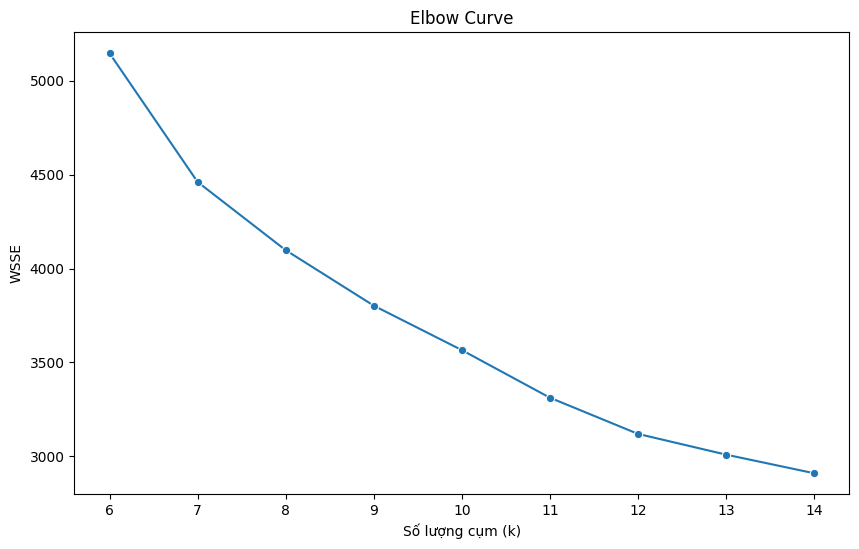

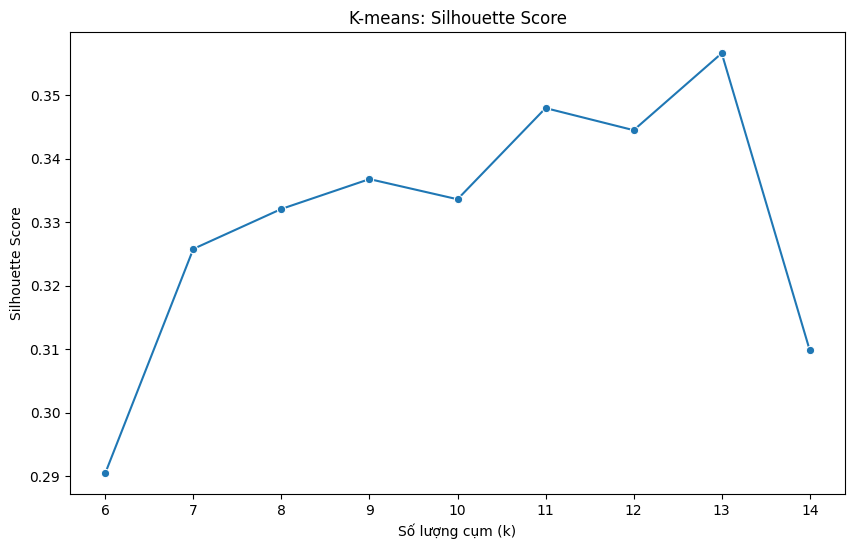

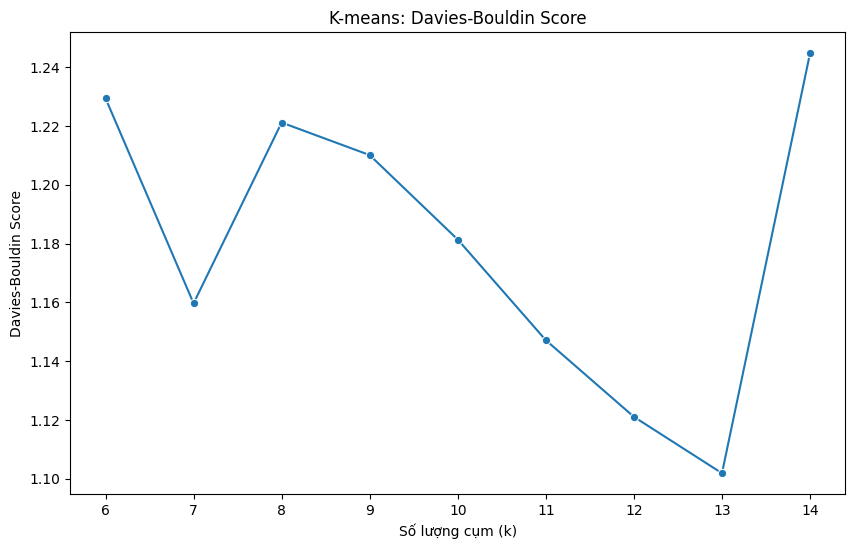

In [90]:

# Vẽ biểu đồ Elbow Curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=wsse_list, marker='o')
plt.xticks(k_range)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('WSSE')
plt.title('Elbow Curve')
plt.savefig('kmeans_elbow_curve.png', dpi=300)
plt.show()

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=silhouette_scores, marker='o')
plt.xticks(k_range)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('K-means: Silhouette Score')
plt.savefig('kmeans_silhouette_score.png', dpi=300)
plt.show()


# Vẽ biểu đồ Davies-Bouldin Score
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=davies_bouldin_scores, marker='o')
plt.xticks(k_range)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('K-means: Davies-Bouldin Score')
plt.savefig('kmeans_davies_bouldin_score.png', dpi=300)
plt.show()


In [91]:

# Lưu điểm số cho k=13
k_means_score = []
k_target = 13
if k_target in k_range:
    k_idx = k_target - k_range[0]
    if k_idx < len(wsse_list):
        k_means_score.extend([wsse_list[k_idx], silhouette_scores[k_idx], davies_bouldin_scores[k_idx]])
        print(f"Điểm số KMeans (k={k_target}):", k_means_score)
    else:
        print(f"Không tìm thấy kết quả cho k={k_target}")
else:
    print(f"k={k_target} không nằm trong phạm vi phân tích")

Điểm số KMeans (k=13): [3009.64165500935, np.float64(0.3566240399852886), np.float64(1.101867724951915)]


In [92]:
# Phân tích DBSCAN
min_samples = 13  # Tham số DBSCAN
print("Đang phân tích DBSCAN...")

# Phân tích để xác định eps tối ưu
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_cluster)
distances, indices = neighbors_fit.kneighbors(df_cluster)


Đang phân tích DBSCAN...


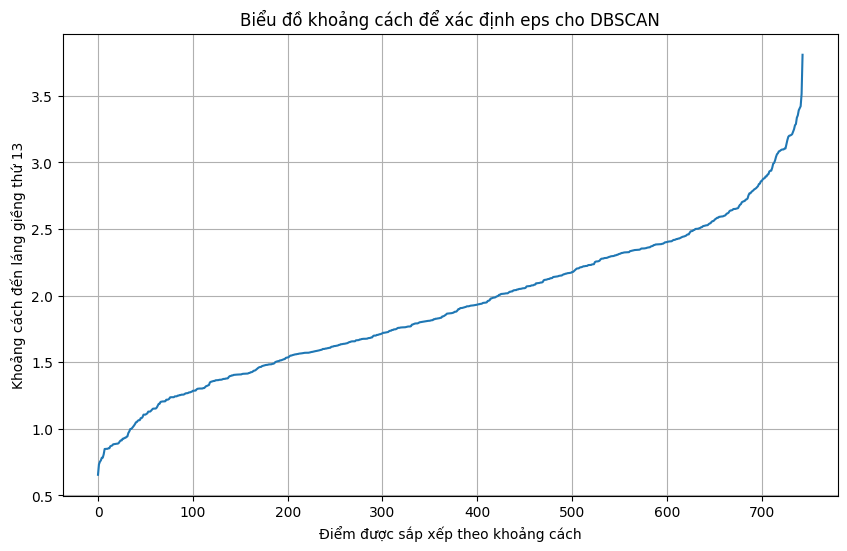

In [93]:

distances = np.sort(distances[:, min_samples-1])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.ylabel(f"Khoảng cách đến láng giềng thứ {min_samples}")
plt.xlabel("Điểm được sắp xếp theo khoảng cách")
plt.grid(True)
plt.title("Biểu đồ khoảng cách để xác định eps cho DBSCAN")
plt.savefig('dbscan_distance_plot.png', dpi=300)
plt.show()


In [94]:
eps = 2.1 # Tham số DBSCAN
# Áp dụng DBSCAN
print(f"Áp dụng DBSCAN với eps={eps}, min_samples={min_samples}...")
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(df_cluster)

# Đếm số lượng cụm và điểm nhiễu
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print(f"Số lượng cụm được tìm thấy: {n_clusters}")
print(f"Số điểm nhiễu: {n_noise}")

# Tính các chỉ số đánh giá
mask = dbscan.labels_ != -1
if np.sum(mask) > 0 and len(np.unique(dbscan.labels_[mask])) > 1:
    dbscan_silhouette = silhouette_score(df_cluster[mask], dbscan.labels_[mask])
    dbscan_davies_bouldin = davies_bouldin_score(df_cluster[mask], dbscan.labels_[mask])
else:
    print("CẢNH BÁO: DBSCAN không tạo ra đủ cụm để tính các chỉ số đánh giá")
    dbscan_silhouette = 0
    dbscan_davies_bouldin = 0

dbscan_score = [None, dbscan_silhouette, dbscan_davies_bouldin]
dbscan_labels = dbscan.labels_

print("Điểm số DBSCAN:", dbscan_score)

Áp dụng DBSCAN với eps=2.1, min_samples=13...
Số lượng cụm được tìm thấy: 9
Số điểm nhiễu: 120
Điểm số DBSCAN: [None, np.float64(0.3478283666580943), np.float64(1.0277292527794912)]


In [95]:
# Phân tích Agglomerative Clustering với nhiều giá trị k khác nhau
print("Đang phân tích Agglomerative Clustering...")
silhouette_scores = []
davies_bouldin_scores = []

for k in k_range:
    print(f"Agglomerative với k = {k}...")
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    
    agglo.fit(df_cluster)
    
    silhouette_scores.append(silhouette_score(df_cluster, agglo.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(df_cluster, agglo.labels_))


Đang phân tích Agglomerative Clustering...
Agglomerative với k = 6...
Agglomerative với k = 7...
Agglomerative với k = 8...
Agglomerative với k = 9...
Agglomerative với k = 10...
Agglomerative với k = 11...
Agglomerative với k = 12...
Agglomerative với k = 13...
Agglomerative với k = 14...


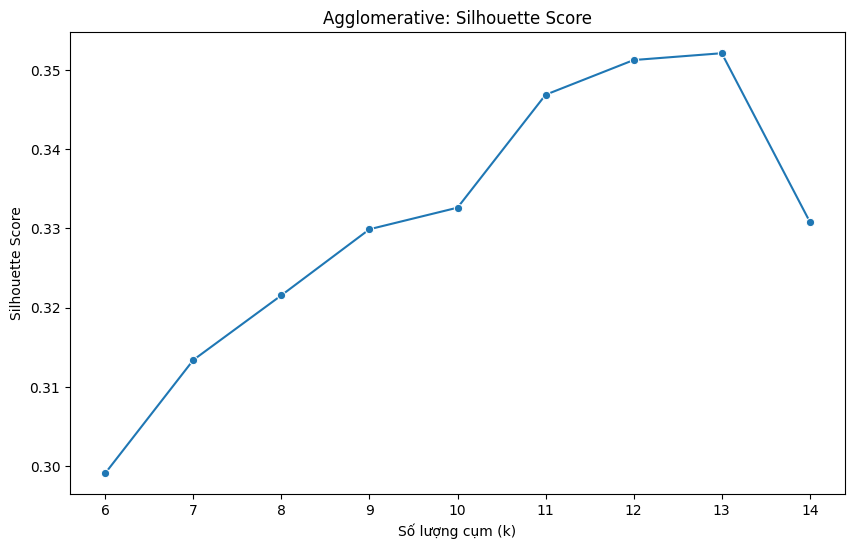

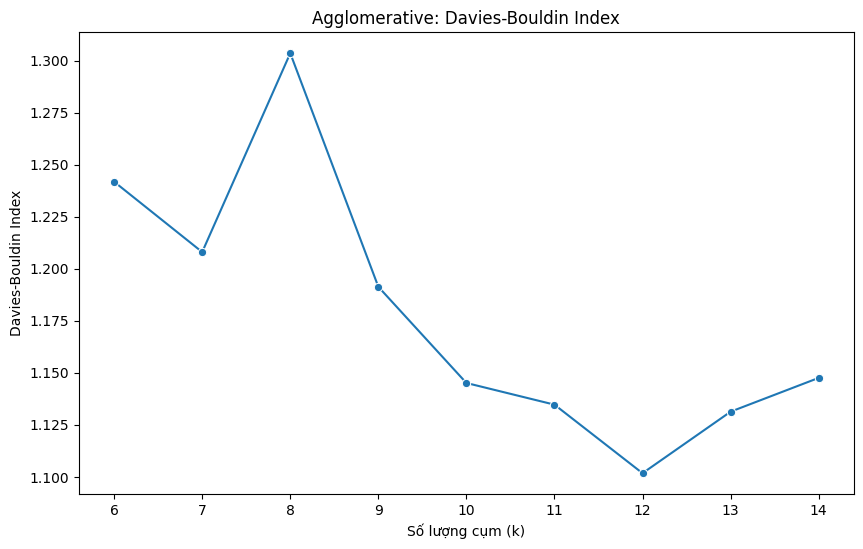

In [96]:

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_range, y=silhouette_scores, marker='o')
plt.xticks(k_range)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative: Silhouette Score')
plt.savefig('agglo_silhouette_score.png', dpi=300)
plt.show()

# Vẽ biểu đồ Davies-Bouldin Index
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_range, y=davies_bouldin_scores, marker='o')
plt.xticks(k_range)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Agglomerative: Davies-Bouldin Index')
plt.savefig('agglo_davies_bouldin_index.png', dpi=300)
plt.show()


In [97]:

# Lưu điểm số cho k=13
agglo_score = []
for k in k_range:
    if k == 13:
        k_idx = k - k_range[0]
        agglo_score.extend([None, silhouette_scores[k_idx], davies_bouldin_scores[k_idx]])
        break

# Áp dụng Agglomerative với k=9 để lấy nhãn
best_agglo = AgglomerativeClustering(n_clusters=13, metric='euclidean', linkage='ward')
best_agglo.fit(df_cluster)
agglo_labels = best_agglo.labels_

print("Điểm số Agglomerative (k=13):", agglo_score)

Điểm số Agglomerative (k=13): [None, np.float64(0.35211682667165395), np.float64(1.1313354658813664)]


In [98]:
print("\nKết quả so sánh các thuật toán phân cụm:")
print("Score: WSSE, Silhouette Score, Davies-Bouldin Score")
print("K-Means:", k_means_score)
print("DBSCAN:", dbscan_score)
print("Agglomerative Clustering:", agglo_score)

# Chọn thuật toán tốt nhất dựa trên Silhouette Score
scores = {
    'kmeans': k_means_score[1] if len(k_means_score) > 1 else 0,
    'dbscan': dbscan_score[1] if len(dbscan_score) > 1 else 0,
    'agglo': agglo_score[1] if len(agglo_score) > 1 else 0
}

best_algorithm = max(scores, key=scores.get)
print(f"\nThuật toán tốt nhất dựa trên Silhouette Score: {best_algorithm}")

results = {
    'kmeans_score': k_means_score,
    'dbscan_score': dbscan_score,
    'agglo_score': agglo_score,
    'best_algorithm': best_algorithm
}


Kết quả so sánh các thuật toán phân cụm:
Score: WSSE, Silhouette Score, Davies-Bouldin Score
K-Means: [3009.64165500935, np.float64(0.3566240399852886), np.float64(1.101867724951915)]
DBSCAN: [None, np.float64(0.3478283666580943), np.float64(1.0277292527794912)]
Agglomerative Clustering: [None, np.float64(0.35211682667165395), np.float64(1.1313354658813664)]

Thuật toán tốt nhất dựa trên Silhouette Score: kmeans


So sánh kết quả giữa việc có và không có feature engineer

In [100]:
df_cluster_no = df_cluster.drop(labels=['temp_quarter', 'temp_region',
       'rain_frequency_month_name', 'maxdiff_temp_name', 'avgdiff_temp_name',
       'maxdiff_wind_name', 'avgdiff_wind_name', 'time_sun_month_name'], axis=1).copy()

In [102]:
# Phân tích K-means với nhiều giá trị k khác nhau
print("Đang phân tích K-means...")
wsse_list_no = []
silhouette_scores_no = []
davies_bouldin_scores_no = []
k_range = range(6, 15)

# Kiểm tra kích thước dữ liệu
print(f"Kích thước dữ liệu: {df_cluster_no.shape}")

for i, k in enumerate(k_range):
    start_time = time.time()
    print(f"K-means với k = {k} ({i+1}/{len(k_range)})...")
    
    try:
        np.random.seed(42)
        # Giảm max_iter xuống để tăng tốc nếu đang chạy chậm
        kmeans_no = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=3000, verbose=0)
        
        # Fit mô hình
        kmeans_no.fit(df_cluster_no)
        
        # Tính các chỉ số
        wsse_list_no.append(kmeans_no.inertia_)
        silhouette_scores_no.append(silhouette_score(df_cluster_no, kmeans_no.labels_))
        davies_bouldin_scores_no.append(davies_bouldin_score(df_cluster_no, kmeans_no.labels_))
        
        # Hiển thị thời gian chạy
        end_time = time.time()
        print(f"  Hoàn thành trong {end_time - start_time:.2f} giây")
        print(f"  WSSE: {kmeans_no.inertia_:.2f}, Silhouette: {silhouette_scores_no[-1]:.4f}, Davies-Bouldin: {davies_bouldin_scores_no[-1]:.4f}")
    
    except Exception as e:
        print(f"Lỗi khi chạy k = {k}: {str(e)}")
        # Thêm giá trị NaN nếu có lỗi
        wsse_list_no.append(float('nan'))
        silhouette_scores_no.append(float('nan'))
        davies_bouldin_scores_no.append(float('nan'))


Đang phân tích K-means...
Kích thước dữ liệu: (744, 7)
K-means với k = 6 (1/9)...
  Hoàn thành trong 0.12 giây
  WSSE: 1912.90, Silhouette: 0.3351, Davies-Bouldin: 1.1498
K-means với k = 7 (2/9)...
  Hoàn thành trong 0.10 giây
  WSSE: 1755.27, Silhouette: 0.3176, Davies-Bouldin: 1.2134
K-means với k = 8 (3/9)...
  Hoàn thành trong 0.10 giây
  WSSE: 1619.91, Silhouette: 0.3316, Davies-Bouldin: 1.1894
K-means với k = 9 (4/9)...
  Hoàn thành trong 0.10 giây
  WSSE: 1519.47, Silhouette: 0.3271, Davies-Bouldin: 1.1883
K-means với k = 10 (5/9)...
  Hoàn thành trong 0.11 giây
  WSSE: 1443.37, Silhouette: 0.2993, Davies-Bouldin: 1.2549
K-means với k = 11 (6/9)...
  Hoàn thành trong 0.09 giây
  WSSE: 1370.86, Silhouette: 0.2745, Davies-Bouldin: 1.3090
K-means với k = 12 (7/9)...
  Hoàn thành trong 0.10 giây
  WSSE: 1291.61, Silhouette: 0.2662, Davies-Bouldin: 1.2950
K-means với k = 13 (8/9)...
  Hoàn thành trong 0.13 giây
  WSSE: 1222.92, Silhouette: 0.2750, Davies-Bouldin: 1.3134
K-means với k

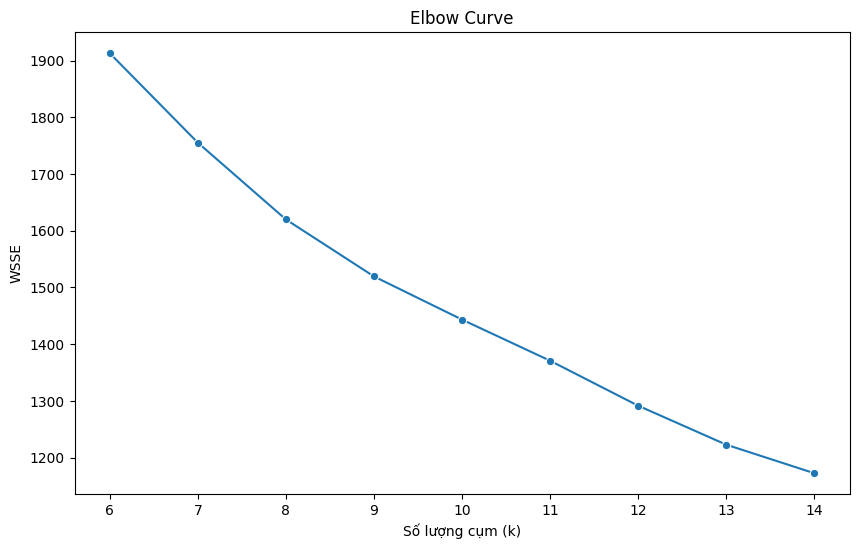

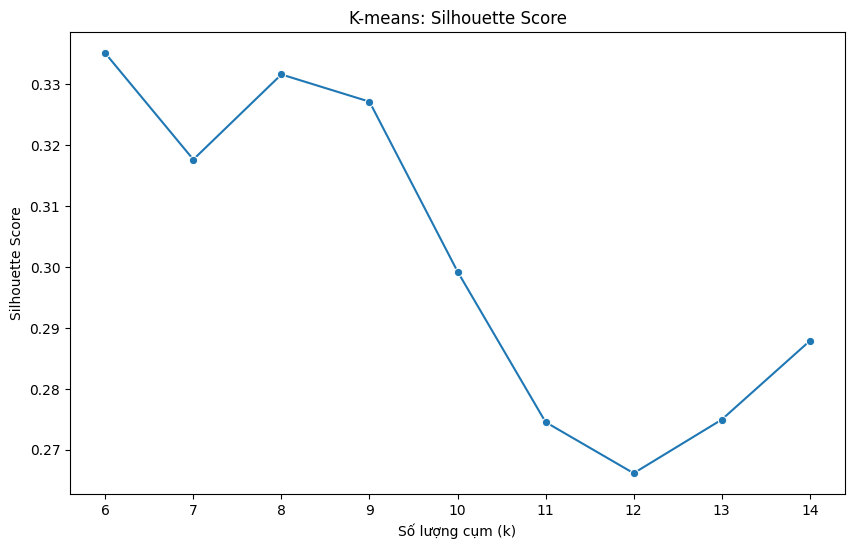

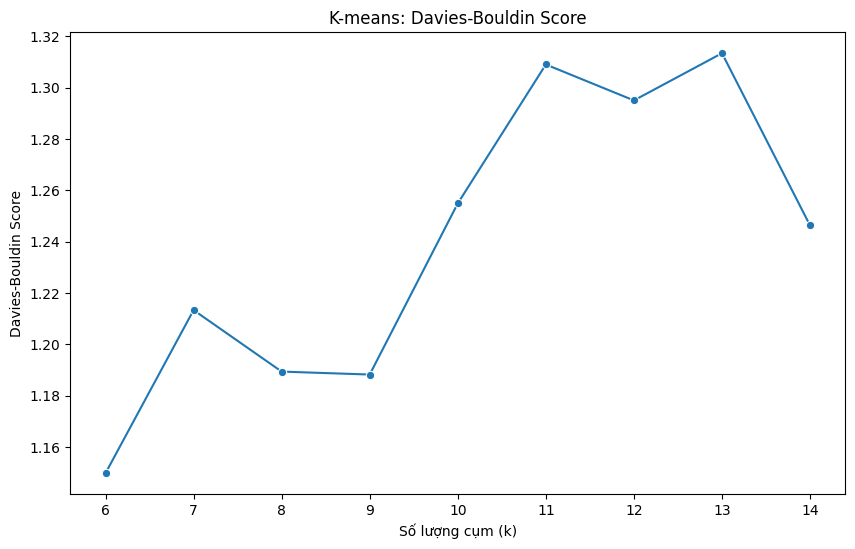

In [103]:

# Vẽ biểu đồ Elbow Curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=wsse_list_no, marker='o')
plt.xticks(k_range)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('WSSE')
plt.title('Elbow Curve')
plt.savefig('kmeans_elbow_curve.png', dpi=300)
plt.show()

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=silhouette_scores_no, marker='o')
plt.xticks(k_range)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('K-means: Silhouette Score')
plt.savefig('kmeans_silhouette_score.png', dpi=300)
plt.show()


# Vẽ biểu đồ Davies-Bouldin Score
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=davies_bouldin_scores_no, marker='o')
plt.xticks(k_range)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('K-means: Davies-Bouldin Score')
plt.savefig('kmeans_davies_bouldin_score.png', dpi=300)
plt.show()


In [105]:

# Lưu điểm số cho k=12
k_means_score_no = []
k_target = 12
if k_target in k_range:
    k_idx = k_target - k_range[0]
    if k_idx < len(wsse_list):
        k_means_score_no.extend([wsse_list_no[k_idx], silhouette_scores_no[k_idx], davies_bouldin_scores_no[k_idx]])
        print(f"Điểm số KMeans (không feature engineer) (k={k_target}):", k_means_score_no)
    else:
        print(f"Không tìm thấy kết quả cho k={k_target}")
else:
    print(f"k={k_target} không nằm trong phạm vi phân tích")

Điểm số KMeans (không feature engineer) (k=12): [1291.6133038857229, np.float64(0.26616064961594293), np.float64(1.295043031211536)]


In [106]:
print(f"Điểm số KMeans (k=13):", k_means_score)
print(f"Điểm số KMeans (không feature engineer) (k=12):", k_means_score_no)

Điểm số KMeans (k=13): [3009.64165500935, np.float64(0.3566240399852886), np.float64(1.101867724951915)]
Điểm số KMeans (không feature engineer) (k=12): [1291.6133038857229, np.float64(0.26616064961594293), np.float64(1.295043031211536)]


In [317]:
df_model.head(5)

,name,month,province,region,terrain,lat,lon,quarter,temp_quarter,temp_region,...,maxdiff_wind_name,avgdiff_wind_name,time_sun_month_name,maxwind_kph,totalprecip_mm,cloud_cover_mean,hci,tc,avgtemp_c,avghumidity
0,Biên Hòa,1,Đồng Nai,3,2,10.95,106.8167,1,-1.127587,1.296734,...,-0.591832,-0.862605,-0.816418,-0.016886,-1.102933,-0.801273,0.011633,0.479590,26.888387,63.516129
1,Biên Hòa,2,Đồng Nai,3,2,10.95,106.8167,1,-1.127587,1.296734,...,-0.591832,-0.862605,-0.509069,0.698194,-1.132375,-1.429041,-0.018691,0.830974,28.064539,60.390071
2,Biên Hòa,3,Đồng Nai,3,2,10.95,106.8167,1,-1.127587,1.296734,...,-0.591832,-0.862605,-0.095713,1.491334,-1.124483,-1.755280,-0.006442,1.178537,29.207097,58.922581
3,Biên Hòa,4,Đồng Nai,3,2,10.95,106.8167,2,1.094748,1.296734,...,-0.591832,-0.862605,0.343086,0.892107,-0.429993,-0.832380,-0.503632,1.130255,29.825333,61.840000
4,Biên Hòa,5,Đồng Nai,3,2,10.95,106.8167,2,1.094748,1.296734,...,-0.591832,-0.862605,0.711319,0.277987,0.681392,0.899293,-1.328393,0.910012,29.408387,67.167742


In [318]:
n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Thêm n_init để tránh cảnh báo
df_ranking['cluster'] = kmeans.fit_predict(df_cluster)

In [319]:
df_ranking[['name', 'month', 'cluster']].sort_values(by='cluster', ascending=True)

,name,month,cluster
0,Biên Hòa,1,0
1,Biên Hòa,2,0
2,Biên Hòa,3,0
743,Đồng Xoài,12,0
299,Long Xuyên,12,0
...,...,...,...
59,Bắc Kạn,12,12
674,Yên Bái,3,12
322,Lạng Sơn,11,12
321,Lạng Sơn,10,12


In [320]:
df_model['cluster'] = kmeans.fit_predict(df_model[label_col+num_col])

In [321]:
centroids = kmeans.cluster_centers_
df_model['dist_to_centroid'] = df_model.apply(
    lambda row: np.linalg.norm(row[label_col + num_col].values - centroids[row['cluster']]),
    axis=1
)

# Với mỗi cụm, tìm chỉ số dòng gần centroid nhất
closest_idx = df_model.groupby('cluster')['dist_to_centroid'].idxmin()

# Đánh dấu dòng đó là "centroid"
df_model['is_centroid'] = False
df_model.loc[closest_idx, 'is_centroid'] = True


In [322]:
df_ranking = df_ranking.merge(
  df_model[['name', 'month', 'is_centroid']],
  on=['name', 'month'],
  how='left'
)

In [323]:
df_ranking.columns

Index(['name', 'month', 'province', 'region', 'terrain', 'lat', 'lon',
       'quarter', 'temp_quarter', 'temp_region', 'rain_frequency_month_name',
       'maxdiff_temp_name', 'avgdiff_temp_name', 'maxdiff_wind_name',
       'avgdiff_wind_name', 'time_sun_month_name', 'maxwind_kph',
       'totalprecip_mm', 'cloud_cover_mean', 'hci', 'tc', 'avgtemp_c',
       'avghumidity', 'cluster', 'is_centroid'],
      dtype='object')

In [324]:
df_ranking.to_csv('df_ranking.csv', index=False)

In [325]:
len(df_ranking['province'].unique())

63